# Imports

In [6]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 10.6 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

# Data Loading 

# MAY 2022 Dataset

Cleaning:

In [ ]:
df = pd.read_csv("data/Original CSV/May-2022.csv")
df.replace('Nill', np.nan, inplace=True)
df.replace('#VALUE!', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1257 non-null   object
 4   Product_Category  1257 non-null   object
 5   Product_Weight    1257 non-null   object
 6   Transfer_Price    1324 non-null   object
 7   Old_MRP           1293 non-null   object
 8   Final_Old_MRP     1293 non-null   object
 9   Ajio_MRP          1293 non-null   object
 10  Amazon_MRP        1293 non-null   object
 11  Amazon_FBA_MRP    1293 non-null   object
 12  Flipkart_MRP      1293 non-null   object
 13  Limeroad_MRP      1293 non-null   object
 14  Myntra_MRP        1299 non-null   object
 15  Paytm_MRP         1293 non-null   object
 16  Snapdeal_MRP      1293 non-null   object
dtypes: int64(1), o

Preprocessing:

In [ ]:
unique_Catalog = df['Product_Catalog'].unique()
Catalog_valuecount = df['Product_Catalog'].value_counts()
Catalog_nullcount = df['Product_Catalog'].isnull().sum()
print("Unique Product Catalog values:", unique_Catalog)
print(Catalog_valuecount)
print("Null values:",Catalog_nullcount)

Unique Product Catalog values: ['Moments' 'Colors-8' 'Breeze-4' 'Rozana' 'Colors-7' 'Mix' 'Surmaya'
 'Four Gems 2' nan]
Product_Catalog
Mix            830
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 73


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

le_style = LabelEncoder()
le_catalog = LabelEncoder()

df['Product_Style_ID_encoded'] = le_style.fit_transform(df['Product_Style_ID'])
df['Product_Catalog_encoded'] = le_catalog.fit_transform(df['Product_Catalog'].astype(str))

train_data = df[df['Product_Catalog'].notnull()]
test_data = df[df['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    df.loc[df['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [ ]:
Catalog_valuecount = df['Product_Catalog'].value_counts()
print(Catalog_valuecount)

Catalog_nullcount = df['Product_Catalog'].isnull().sum()
print("Null values:",Catalog_nullcount)

Product_Catalog
Mix            865
Surmaya        230
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 0


In [ ]:
unique_Category = df['Product_Category'].unique()
Category_valuecount = df['Product_Category'].value_counts()
Category_nullcount = df['Product_Category'].isnull().sum()
print("Unique Product Category values:", unique_Category)
print(Category_valuecount)
print("Null values:",Category_nullcount)

Unique Product Category values: ['Kurta' 'Kurta Set' 'Gown' 'Tops' nan]
Product_Category
Kurta        820
Kurta Set    360
Tops          45
Gown          32
Name: count, dtype: int64
Null values: 73


In [ ]:
le_category = LabelEncoder()

df['Product_Category_encoded'] = le_category.fit_transform(df['Product_Category'].astype(str))

train_data = df[df['Product_Category'].notnull()]
test_data = df[df['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    df.loc[df['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [ ]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

df['Product_Weight'] = df.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [ ]:
df['Transfer_Price'] = pd.to_numeric(df['Transfer_Price'], errors='coerce')
df['Old_MRP'] = pd.to_numeric(df['Old_MRP'], errors='coerce')
df['Final_Old_MRP'] =pd.to_numeric(df['Final_Old_MRP'], errors='coerce')
df['Ajio_MRP'] = pd.to_numeric(df['Ajio_MRP'], errors='coerce')
df['Amazon_MRP'] = pd.to_numeric(df['Amazon_MRP'], errors='coerce')
df['Amazon_FBA_MRP'] = pd.to_numeric(df['Amazon_FBA_MRP'], errors='coerce')
df['Flipkart_MRP'] = pd.to_numeric(df['Flipkart_MRP'], errors='coerce')
df['Limeroad_MRP'] = pd.to_numeric(df['Limeroad_MRP'], errors='coerce')
df['Myntra_MRP'] = pd.to_numeric(df['Myntra_MRP'], errors='coerce')
df['Paytm_MRP'] = pd.to_numeric(df['Paytm_MRP'], errors='coerce')
df['Snapdeal_MRP'] = pd.to_numeric(df['Snapdeal_MRP'], errors='coerce')
df['Product_Weight'] = pd.to_numeric(df['Product_Weight'], errors='coerce')

In [ ]:
df['Product_SKU'] = df['Product_SKU'].astype(str)
df['Product_Style_ID'] = df['Product_Style_ID'].astype(str)
df['Product_Catalog'] = df['Product_Catalog'].astype(str)
df['Product_Category'] = df['Product_Category'].astype(str)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

train_data = df[df['Transfer_Price'].notnull()]
test_data = df[df['Transfer_Price'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

df.loc[df['Transfer_Price'].isnull(), 'Transfer_Price'] = predicted_transferprice

In [ ]:
columns_to_fill = ['Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
                   'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
                   'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

for column in columns_to_fill:
    train_data = df[df[column].notnull()]
    test_data = df[df[column].isnull()]

    if not train_data.empty and not test_data.empty:
        X_train = train_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price']]
        y_train = train_data[column]
        X_test = test_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price']]

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)
        predicted_values = knn.predict(X_test)

        df.loc[df[column].isnull(), column] = predicted_values

df.drop(columns=['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1330 non-null   int64  
 1   Product_SKU       1330 non-null   object 
 2   Product_Style_ID  1330 non-null   object 
 3   Product_Catalog   1330 non-null   object 
 4   Product_Category  1330 non-null   object 
 5   Product_Weight    1330 non-null   float64
 6   Transfer_Price    1330 non-null   float64
 7   Old_MRP           1330 non-null   float64
 8   Final_Old_MRP     1330 non-null   float64
 9   Ajio_MRP          1330 non-null   float64
 10  Amazon_MRP        1330 non-null   float64
 11  Amazon_FBA_MRP    1330 non-null   float64
 12  Flipkart_MRP      1330 non-null   float64
 13  Limeroad_MRP      1330 non-null   float64
 14  Myntra_MRP        1330 non-null   float64
 15  Paytm_MRP         1330 non-null   float64
 16  Snapdeal_MRP      1330 non-null   float64


In [ ]:
df['Profit_Ajio'] = df['Final_Old_MRP'] - df['Ajio_MRP']
df['Profit_Amazon'] = df['Final_Old_MRP'] - df['Amazon_MRP']
df['Profit_Amazon_FBA'] = df['Final_Old_MRP'] - df['Amazon_FBA_MRP']
df['Profit_Flipkart'] = df['Final_Old_MRP'] - df['Flipkart_MRP']
df['Profit_Limeroad'] = df['Final_Old_MRP'] - df['Limeroad_MRP']
df['Profit_Myntra'] = df['Final_Old_MRP'] - df['Myntra_MRP']
df['Profit_Paytm'] = df['Final_Old_MRP'] - df['Paytm_MRP']
df['Profit_Snapdeal'] = df['Final_Old_MRP'] - df['Snapdeal_MRP']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1330 non-null   int64  
 1   Product_SKU        1330 non-null   object 
 2   Product_Style_ID   1330 non-null   object 
 3   Product_Catalog    1330 non-null   object 
 4   Product_Category   1330 non-null   object 
 5   Product_Weight     1330 non-null   float64
 6   Transfer_Price     1330 non-null   float64
 7   Old_MRP            1330 non-null   float64
 8   Final_Old_MRP      1330 non-null   float64
 9   Ajio_MRP           1330 non-null   float64
 10  Amazon_MRP         1330 non-null   float64
 11  Amazon_FBA_MRP     1330 non-null   float64
 12  Flipkart_MRP       1330 non-null   float64
 13  Limeroad_MRP       1330 non-null   float64
 14  Myntra_MRP         1330 non-null   float64
 15  Paytm_MRP          1330 non-null   float64
 16  Snapdeal_MRP       1330 

Analysing

In [ ]:
import matplotlib.pyplot as plt

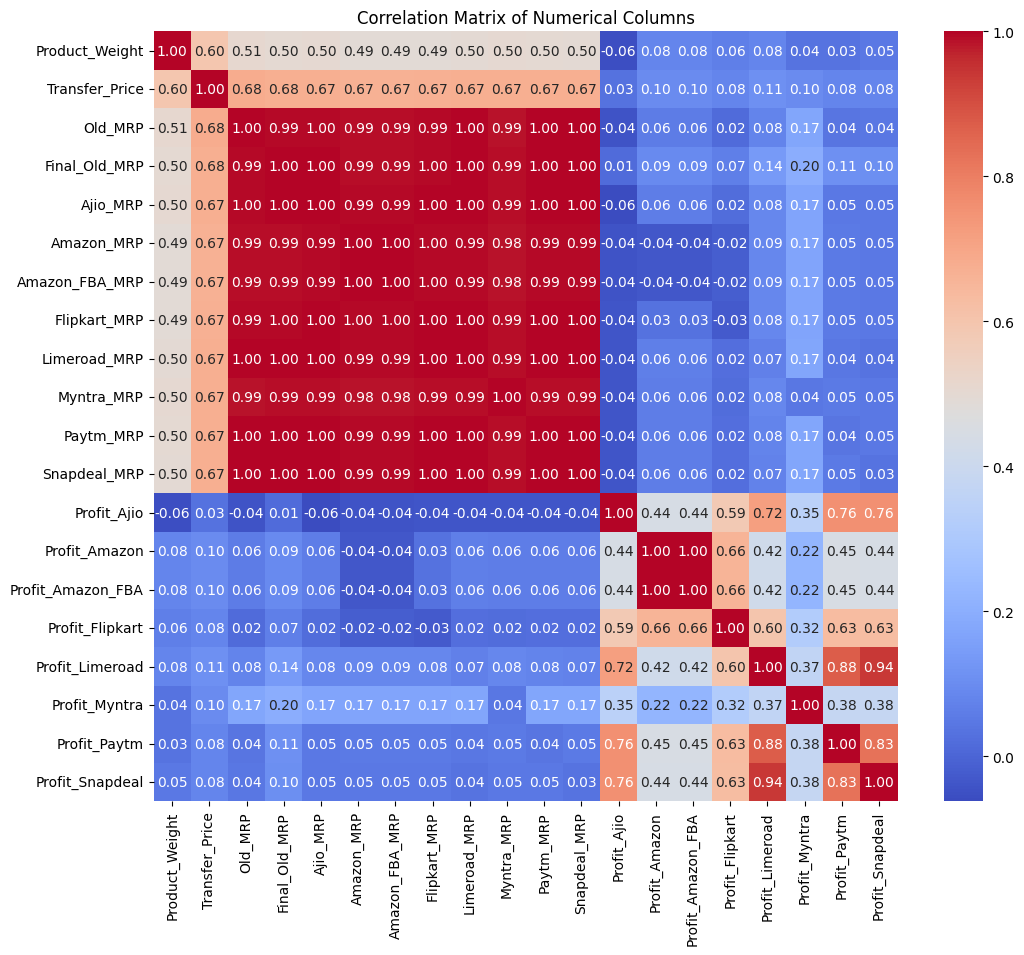

In [ ]:
import seaborn as sns
numerical_columns = ['Product_Weight', 'Transfer_Price', 'Old_MRP', 'Final_Old_MRP', 
                     'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP', 
                     'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP',
                     'Profit_Ajio', 'Profit_Amazon', 'Profit_Amazon_FBA', 
                     'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra',
                     'Profit_Paytm', 'Profit_Snapdeal']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

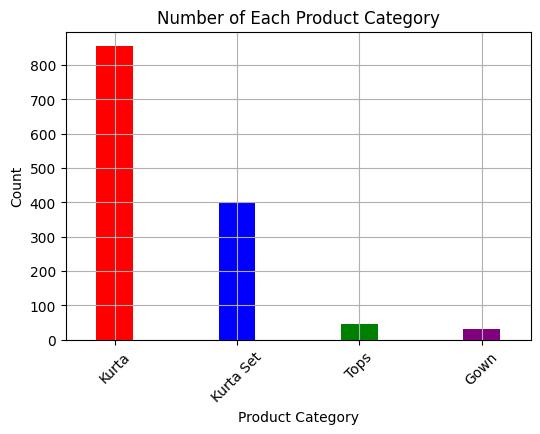

In [ ]:
import matplotlib.pyplot as plt
category_counts = df['Product_Category'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], width=0.3)
plt.title('Number of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
kurta_mean_value = round(df[df['Product_Category'] == 'Kurta']['Final_Old_MRP'].mean(),2)
kurtaSet_mean_value = round(df[df['Product_Category'] == 'Kurta Set']['Final_Old_MRP'].mean(),2)
Gown_mean_value = round(df[df['Product_Category'] == 'Gown']['Final_Old_MRP'].mean(),2)
Tops_mean_value = round(df[df['Product_Category'] == 'Tops']['Final_Old_MRP'].mean(),2)
print(f"The Mean price of Kurta is {kurta_mean_value}. \nThe Mean price of Kurta Set is {kurtaSet_mean_value}. \nThe Mean price of Gowns is {Gown_mean_value}. \nThe Mean price of Tops is {Tops_mean_value}")

The Mean price of Kurta is 2011.32. 
The Mean price of Kurta Set is 2727.09. 
The Mean price of Gowns is 3151.25. 
The Mean price of Tops is 1728.33


In [ ]:
mean_values = {}
columns = ['Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
            'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']
for column in columns:
    mean_values[column] = round(df.groupby('Product_Category')[column].mean(),2)
print(mean_values)

{'Amazon_MRP': Product_Category
Gown         3151.25
Kurta        2029.19
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_MRP, dtype: float64, 'Amazon_FBA_MRP': Product_Category
Gown         3151.25
Kurta        2029.19
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_FBA_MRP, dtype: float64, 'Flipkart_MRP': Product_Category
Gown         3151.25
Kurta        2021.69
Kurta Set    2728.43
Tops         1739.44
Name: Flipkart_MRP, dtype: float64, 'Limeroad_MRP': Product_Category
Gown         3151.25
Kurta        2022.74
Kurta Set    2726.95
Tops         1728.33
Name: Limeroad_MRP, dtype: float64, 'Myntra_MRP': Product_Category
Gown         3151.25
Kurta        2014.09
Kurta Set    2719.96
Tops         1728.56
Name: Myntra_MRP, dtype: float64, 'Paytm_MRP': Product_Category
Gown         3151.25
Kurta        2015.96
Kurta Set    2726.95
Tops         1728.33
Name: Paytm_MRP, dtype: float64, 'Snapdeal_MRP': Product_Category
Gown         3151.25
Kurta        2017.83
Kurta Set    272

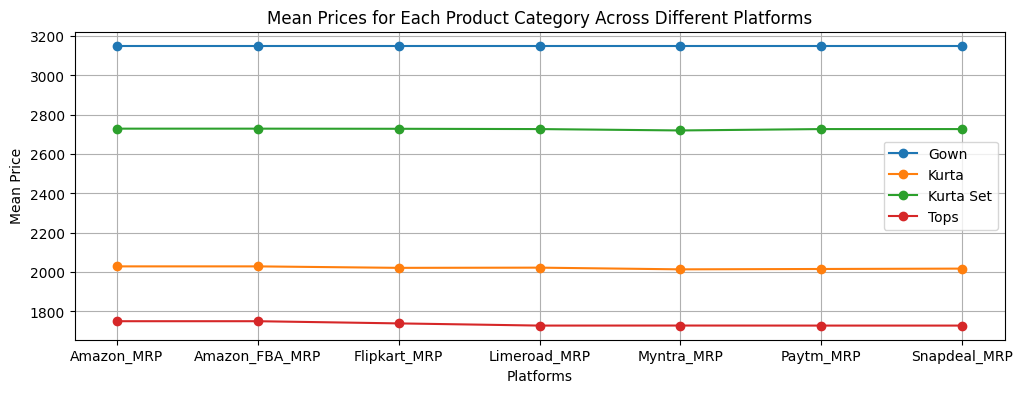

In [ ]:
mean_df = pd.DataFrame(mean_values)

plt.figure(figsize=(12, 4))
for category in mean_df.index:
    plt.plot(mean_df.columns, mean_df.loc[category], marker='o', label=category)

plt.title('Mean Prices for Each Product Category Across Different Platforms')
plt.xlabel('Platforms')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

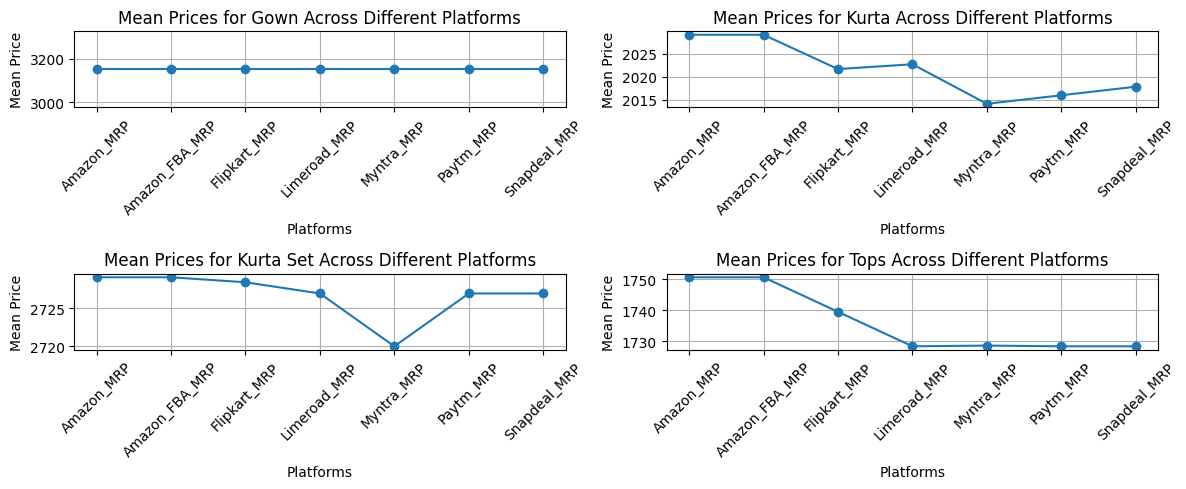

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

categories = mean_df.index
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    ax.plot(mean_df.columns, mean_df.loc[category], marker='o')
    ax.set_title(f'Mean Prices for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Mean Price')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

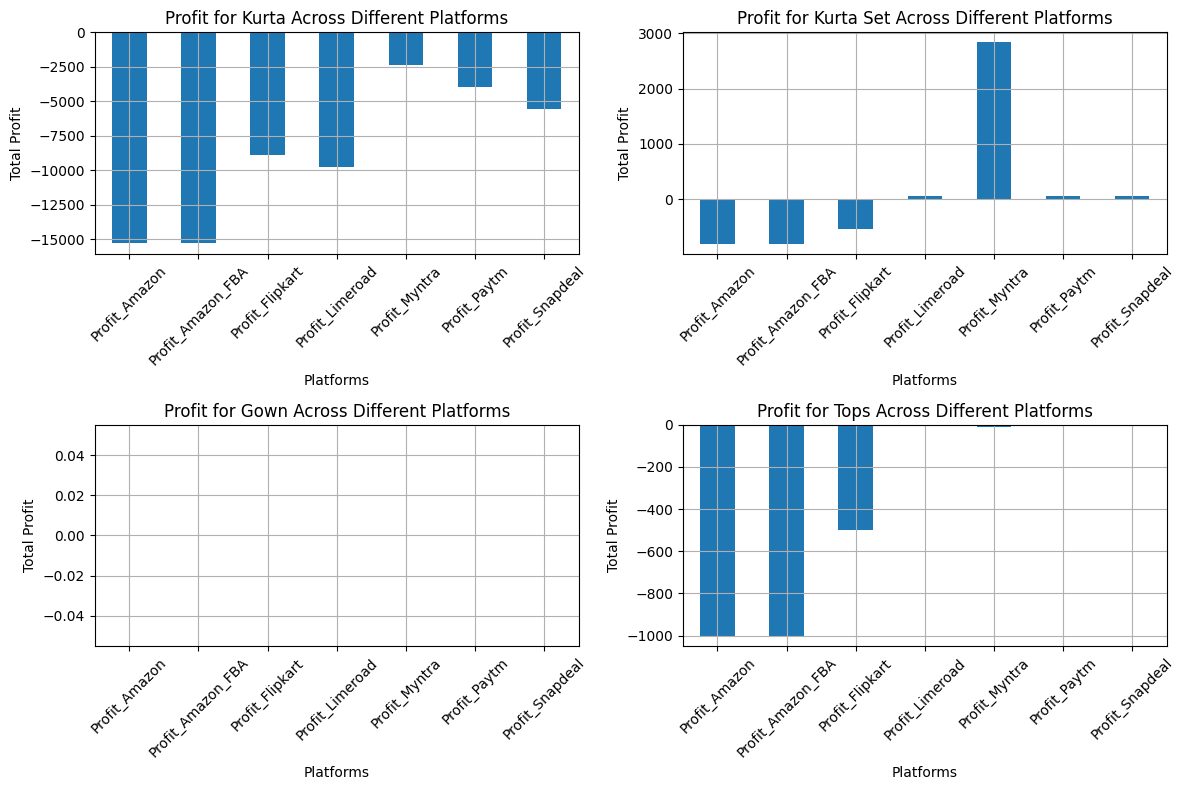

In [ ]:
profit = {}
columns = ['Profit_Amazon', 'Profit_Amazon_FBA', 'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra', 'Profit_Paytm', 'Profit_Snapdeal']
for column in columns:
    profit[column] = round(df.groupby('Product_Category')[column].sum(),2)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
profit_df = pd.DataFrame(profit)

categories = ['Kurta', 'Kurta Set', 'Gown', 'Tops']
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    profit_df.loc[category].plot(kind='bar', ax=ax)
    ax.set_title(f'Profit for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Total Profit')
    ax.tick_params(axis='x', rotation=45)  
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
total_profit = {
    'Amazon': df['Profit_Amazon'].sum(),
    'Amazon_FBA': df['Profit_Amazon_FBA'].sum(),
    'Flipkart': df['Profit_Flipkart'].sum(),
    'Limeroad': df['Profit_Limeroad'].sum(),
    'Myntra': df['Profit_Myntra'].sum(),
    'Paytm': df['Profit_Paytm'].sum(),
    'Snapdeal': df['Profit_Snapdeal'].sum()
}

total_profit_df = pd.DataFrame(list(total_profit.items()), columns=['Platform', 'Total Profit'])
print(total_profit_df)

     Platform  Total Profit
0      Amazon -17081.333333
1  Amazon_FBA -17081.333333
2    Flipkart  -9902.333333
3    Limeroad  -9714.333333
4      Myntra    459.666667
5       Paytm  -3914.333333
6    Snapdeal  -5514.333333


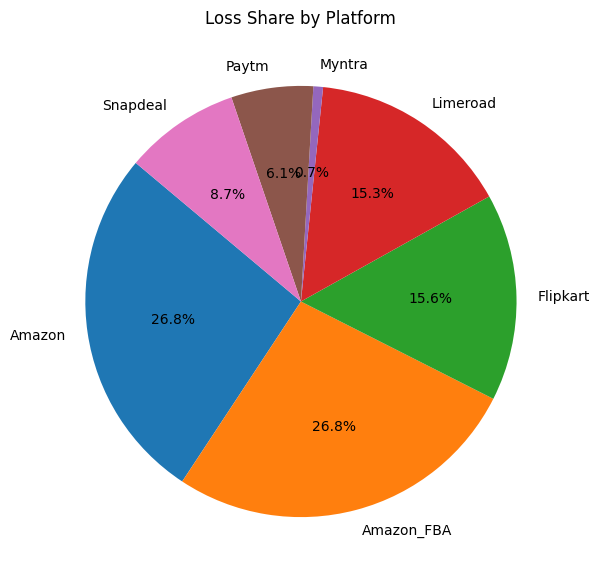

In [ ]:
total_profit_df = pd.DataFrame(list(total_profit.items()), columns=['Platform', 'Total Profit'])

total_profit_df.loc[total_profit_df['Total Profit'] < 0, 'Total Profit'] *= -1

loss_df = total_profit_df[total_profit_df['Total Profit'] > 0]

plt.figure(figsize=(10, 7))
plt.pie(loss_df['Total Profit'], labels=loss_df['Platform'], autopct='%1.1f%%', startangle=140)
plt.title('Loss Share by Platform')
plt.show()

In [ ]:
mean_profit_df = {
    'Amazon': df['Profit_Amazon'].mean(),
    'Amazon_FBA': df['Profit_Amazon_FBA'].mean(),
    'Flipkart': df['Profit_Flipkart'].mean(),
    'Limeroad': df['Profit_Limeroad'].mean(),
    'Myntra': df['Profit_Myntra'].mean(),
    'Paytm': df['Profit_Paytm'].mean(),
    'Snapdeal': df['Profit_Snapdeal'].mean()
}

mean_profit = pd.DataFrame(list(mean_profit_df.items()), columns=['Platform', 'Total Profit'])
print(mean_profit)

     Platform  Total Profit
0      Amazon    -12.843108
1  Amazon_FBA    -12.843108
2    Flipkart     -7.445363
3    Limeroad     -7.304010
4      Myntra      0.345614
5       Paytm     -2.943108
6    Snapdeal     -4.146115


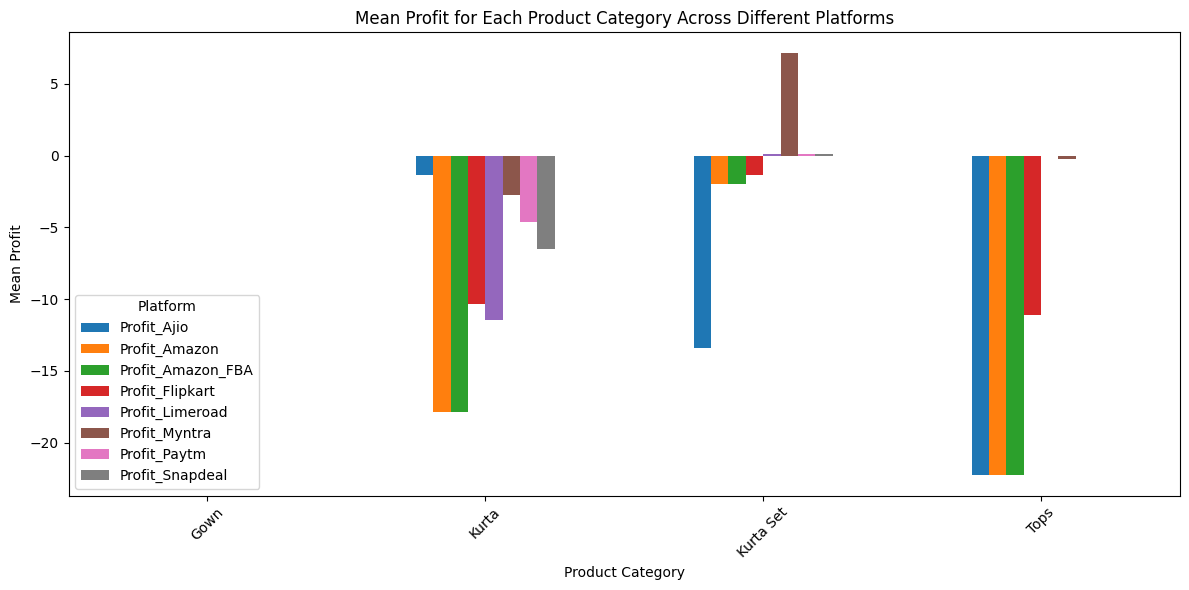

In [ ]:
mean_profit = df.groupby('Product_Category')[['Profit_Ajio', 'Profit_Amazon', 'Profit_Amazon_FBA', 'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra', 'Profit_Paytm', 'Profit_Snapdeal']].mean()

mean_profit.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Profit for Each Product Category Across Different Platforms')
plt.xlabel('Product Category')
plt.ylabel('Mean Profit')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

# P L MARCH 2021

Cleaning

In [ ]:
ds = pd.read_csv("data/Original CSV/P  L March 2021.csv")
ds.replace('Nill', np.nan, inplace=True)
ds.replace('#VALUE!', np.nan, inplace=True)
ds.rename(columns=lambda x: x.strip(), inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1330 non-null   int64 
 1   Product_SKU             1330 non-null   object
 2   Product_Style_ID        1330 non-null   object
 3   Product_Catalog         1257 non-null   object
 4   Product_Category        1257 non-null   object
 5   Product_Weight          1257 non-null   object
 6   Transfer_Price_Level_1  1324 non-null   object
 7   Transfer_Price_Level_2  1324 non-null   object
 8   Old_MRP                 1293 non-null   object
 9   Final_Old_MRP           1293 non-null   object
 10  Ajio_MRP                1293 non-null   object
 11  Amazon_MRP              1293 non-null   object
 12  Amazon_FBA_MRP          1293 non-null   object
 13  Flipkart_MRP            1293 non-null   object
 14  Limeroad_MRP            1293 non-null   object
 15  Mynt

In [ ]:
ds.head()

index     Product_SKU Product_Style_ID Product_Catalog Product_Category  \
0      0    Os206_3141_S       Os206_3141         Moments            Kurta   
1      1    Os206_3141_M       Os206_3141         Moments            Kurta   
2      2    Os206_3141_L       Os206_3141         Moments            Kurta   
3      3   Os206_3141_XL       Os206_3141         Moments            Kurta   
4      4  Os206_3141_2XL       Os206_3141         Moments            Kurta   

  Product_Weight Transfer_Price_Level_1 Transfer_Price_Level_2 Old_MRP  \
0            0.3                    538                 435.78    2178   
1            0.3                    538                 435.78    2178   
2            0.3                    538                 435.78    2178   
3            0.3                    538                 435.78    2178   
4            0.3                    538                 435.78    2178   

  Final_Old_MRP Ajio_MRP Amazon_MRP Amazon_FBA_MRP Flipkart_MRP Limeroad_MRP  \
0          2295     2295       2295           2295         2295         2295   
1          2295     2295       2295           2295         2295         2295   
2          2295     2295       2295           2295         2295         2295   
3          2295     2295       2295           2295         2295         2295   
4          2295     2295       2295           2295         2295         2295   

  Myntra_MRP Paytm_MRP Snapdeal_MRP  
0       2295      2295         2295  
1       2295      2295         2295  
2       2295      2295         2295  
3       2295      2295         2295  
4       2295      2295         2295

Preprocessing:

In [ ]:
unique_CatalogforMarch = ds['Product_Catalog'].unique()
CatalogforMarch_valuecount = ds['Product_Catalog'].value_counts()
CatalogforMarch_nullcount = ds['Product_Catalog'].isnull().sum()
print("Unique Product Catalog values:", unique_CatalogforMarch)
print(CatalogforMarch_valuecount)
print("Null values:",CatalogforMarch_nullcount)

Unique Product Catalog values: ['Moments' 'Colors-8' 'Breeze-4' 'Rozana' 'Colors-7' 'Mix' 'Surmaya'
 'Four Gems 2' nan]
Product_Catalog
Mix            830
Surmaya        192
Colors-8        48
Rozana          48
Colors-7        43
Moments         36
Breeze-4        36
Four Gems 2     24
Name: count, dtype: int64
Null values: 73


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_style = LabelEncoder()
le_catalog = LabelEncoder()

ds['Product_Style_ID_encoded'] = le_style.fit_transform(ds['Product_Style_ID'])
ds['Product_Catalog_encoded'] = le_catalog.fit_transform(ds['Product_Catalog'].astype(str))

train_data = ds[ds['Product_Catalog'].notnull()]
test_data = ds[ds['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    ds.loc[ds['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [ ]:
le_category = LabelEncoder()

ds['Product_Category_encoded'] = le_category.fit_transform(ds['Product_Category'].astype(str))

train_data = ds[ds['Product_Category'].notnull()]
test_data = ds[ds['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    ds.loc[ds['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [ ]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

ds['Product_Weight'] = ds.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [ ]:
ds['Transfer_Price_Level_1'] = pd.to_numeric(ds['Transfer_Price_Level_1'], errors='coerce')
ds['Transfer_Price_Level_2'] = pd.to_numeric(ds['Transfer_Price_Level_2'], errors='coerce')
ds['Old_MRP'] = pd.to_numeric(ds['Old_MRP'], errors='coerce')
ds['Final_Old_MRP'] =pd.to_numeric(ds['Final_Old_MRP'], errors='coerce')
ds['Ajio_MRP'] = pd.to_numeric(ds['Ajio_MRP'], errors='coerce')
ds['Amazon_MRP'] = pd.to_numeric(ds['Amazon_MRP'], errors='coerce')
ds['Amazon_FBA_MRP'] = pd.to_numeric(ds['Amazon_FBA_MRP'], errors='coerce')
ds['Flipkart_MRP'] = pd.to_numeric(ds['Flipkart_MRP'], errors='coerce')
ds['Limeroad_MRP'] = pd.to_numeric(ds['Limeroad_MRP'], errors='coerce')
ds['Myntra_MRP'] = pd.to_numeric(ds['Myntra_MRP'], errors='coerce')
ds['Paytm_MRP'] = pd.to_numeric(ds['Paytm_MRP'], errors='coerce')
ds['Snapdeal_MRP'] = pd.to_numeric(ds['Snapdeal_MRP'], errors='coerce')
ds['Product_Weight'] = pd.to_numeric(ds['Product_Weight'], errors='coerce')

In [ ]:
ds['Product_SKU'] = ds['Product_SKU'].astype(str)
ds['Product_Style_ID'] = ds['Product_Style_ID'].astype(str)
ds['Product_Catalog'] = ds['Product_Catalog'].astype(str)
ds['Product_Category'] = ds['Product_Category'].astype(str)

In [ ]:
train_data = ds[ds['Transfer_Price_Level_1'].notnull()]
test_data = ds[ds['Transfer_Price_Level_1'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price_Level_1']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

ds.loc[ds['Transfer_Price_Level_1'].isnull(), 'Transfer_Price_Level_1'] = predicted_transferprice

In [ ]:
train_data = ds[ds['Transfer_Price_Level_2'].notnull()]
test_data = ds[ds['Transfer_Price_Level_2'].isnull()]

X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]
y_train = train_data['Transfer_Price_Level_2']
X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded', 'Product_Category_encoded']]

knn.fit(X_train, y_train)

predicted_transferprice = knn.predict(X_test)

ds.loc[ds['Transfer_Price_Level_2'].isnull(), 'Transfer_Price_Level_2'] = predicted_transferprice

In [ ]:
columns_to_fill = ['Old_MRP', 'Final_Old_MRP', 'Ajio_MRP',
                   'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP',
                   'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']

for column in columns_to_fill:
    train_data = ds[ds[column].notnull()]
    test_data = ds[ds[column].isnull()]

    if not train_data.empty and not test_data.empty:
        X_train = train_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2']]
        y_train = train_data[column]
        X_test = test_data[['Product_Style_ID_encoded', 'Product_Category_encoded', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2']]

        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)
        
        predicted_values = knn.predict(X_test)
        
        ds.loc[ds[column].isnull(), column] = predicted_values


ds.drop(columns=['Product_Style_ID_encoded', 'Product_Category_encoded', 'Product_Catalog_encoded'], inplace=True)

In [ ]:
ds['Profit_Ajio'] = ds['Final_Old_MRP'] - ds['Ajio_MRP']
ds['Profit_Amazon'] = ds['Final_Old_MRP'] - ds['Amazon_MRP']
ds['Profit_Amazon_FBA'] = ds['Final_Old_MRP'] - ds['Amazon_FBA_MRP']
ds['Profit_Flipkart'] = ds['Final_Old_MRP'] - ds['Flipkart_MRP']
ds['Profit_Limeroad'] = ds['Final_Old_MRP'] - ds['Limeroad_MRP']
ds['Profit_Myntra'] = ds['Final_Old_MRP'] - ds['Myntra_MRP']
ds['Profit_Paytm'] = ds['Final_Old_MRP'] - ds['Paytm_MRP']
ds['Profit_Snapdeal'] = ds['Final_Old_MRP'] - ds['Snapdeal_MRP']

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1330 non-null   int64  
 1   Product_SKU             1330 non-null   object 
 2   Product_Style_ID        1330 non-null   object 
 3   Product_Catalog         1330 non-null   object 
 4   Product_Category        1330 non-null   object 
 5   Product_Weight          1330 non-null   float64
 6   Transfer_Price_Level_1  1330 non-null   float64
 7   Transfer_Price_Level_2  1330 non-null   float64
 8   Old_MRP                 1330 non-null   float64
 9   Final_Old_MRP           1330 non-null   float64
 10  Ajio_MRP                1330 non-null   float64
 11  Amazon_MRP              1330 non-null   float64
 12  Amazon_FBA_MRP          1330 non-null   float64
 13  Flipkart_MRP            1330 non-null   float64
 14  Limeroad_MRP            1330 non-null   

Analyzing

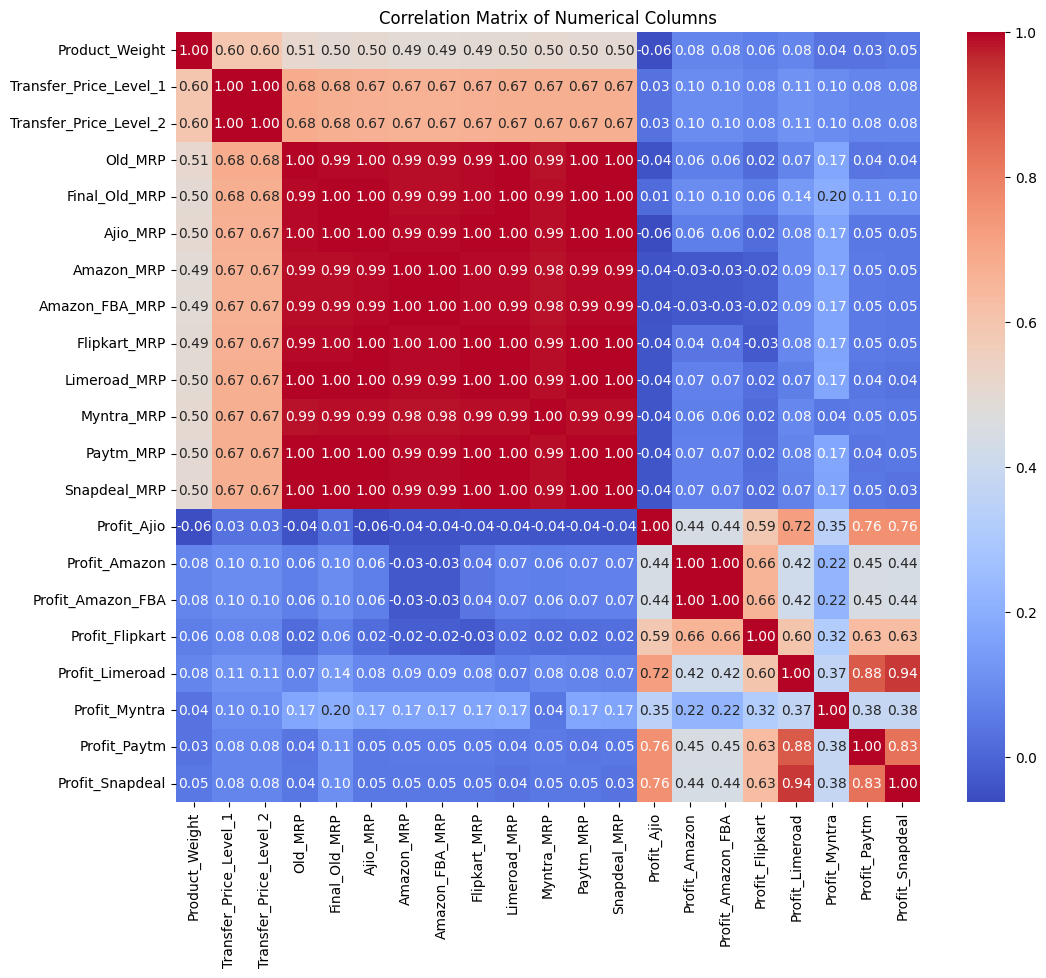

In [ ]:
numerical_columns = ['Product_Weight', 'Transfer_Price_Level_1', 'Transfer_Price_Level_2', 'Old_MRP', 'Final_Old_MRP', 
                     'Ajio_MRP', 'Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP', 
                     'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP',
                     'Profit_Ajio', 'Profit_Amazon', 'Profit_Amazon_FBA', 
                     'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra',
                     'Profit_Paytm', 'Profit_Snapdeal']

correlation_matrix = ds[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

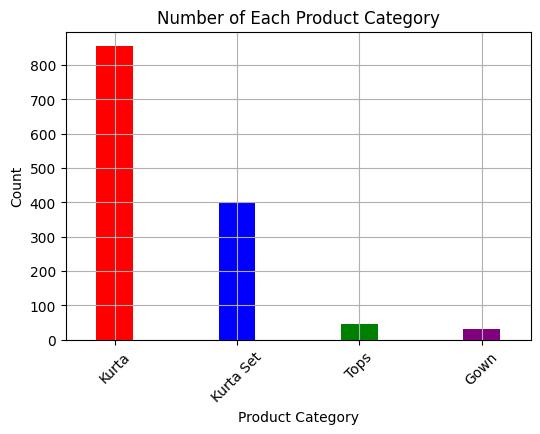

In [ ]:
category_counts = ds['Product_Category'].value_counts()

plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], width=0.3)
plt.title('Number of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
kurta_mean_value_ds = round(ds[ds['Product_Category'] == 'Kurta']['Final_Old_MRP'].mean(),2)
kurtaSet_mean_value_ds = round(ds[ds['Product_Category'] == 'Kurta Set']['Final_Old_MRP'].mean(),2)
Gown_mean_value_ds = round(ds[ds['Product_Category'] == 'Gown']['Final_Old_MRP'].mean(),2)
Tops_mean_value_ds = round(ds[ds['Product_Category'] == 'Tops']['Final_Old_MRP'].mean(),2)
print(f"The Mean price of Kurta is {kurta_mean_value_ds}. \nThe Mean price of Kurta Set is {kurtaSet_mean_value_ds}. \nThe Mean price of Gowns is {Gown_mean_value_ds}. \nThe Mean price of Tops is {Tops_mean_value_ds}")

The Mean price of Kurta is 2007.82. 
The Mean price of Kurta Set is 2727.09. 
The Mean price of Gowns is 3151.25. 
The Mean price of Tops is 1728.33


In [ ]:
mean_values_ds = {}
columns = ['Amazon_MRP', 'Amazon_FBA_MRP', 'Flipkart_MRP', 'Limeroad_MRP', 'Myntra_MRP', 'Paytm_MRP', 'Snapdeal_MRP']
for column in columns:
    mean_values_ds[column] = round(ds.groupby('Product_Category')[column].mean(),2)
print(mean_values_ds)

{'Amazon_MRP': Product_Category
Gown         3151.25
Kurta        2025.69
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_MRP, dtype: float64, 'Amazon_FBA_MRP': Product_Category
Gown         3151.25
Kurta        2025.69
Kurta Set    2729.09
Tops         1750.56
Name: Amazon_FBA_MRP, dtype: float64, 'Flipkart_MRP': Product_Category
Gown         3151.25
Kurta        2018.19
Kurta Set    2728.43
Tops         1739.44
Name: Flipkart_MRP, dtype: float64, 'Limeroad_MRP': Product_Category
Gown         3151.25
Kurta        2019.24
Kurta Set    2726.95
Tops         1728.33
Name: Limeroad_MRP, dtype: float64, 'Myntra_MRP': Product_Category
Gown         3151.25
Kurta        2010.59
Kurta Set    2719.96
Tops         1728.56
Name: Myntra_MRP, dtype: float64, 'Paytm_MRP': Product_Category
Gown         3151.25
Kurta        2012.46
Kurta Set    2726.95
Tops         1728.33
Name: Paytm_MRP, dtype: float64, 'Snapdeal_MRP': Product_Category
Gown         3151.25
Kurta        2014.33
Kurta Set    272

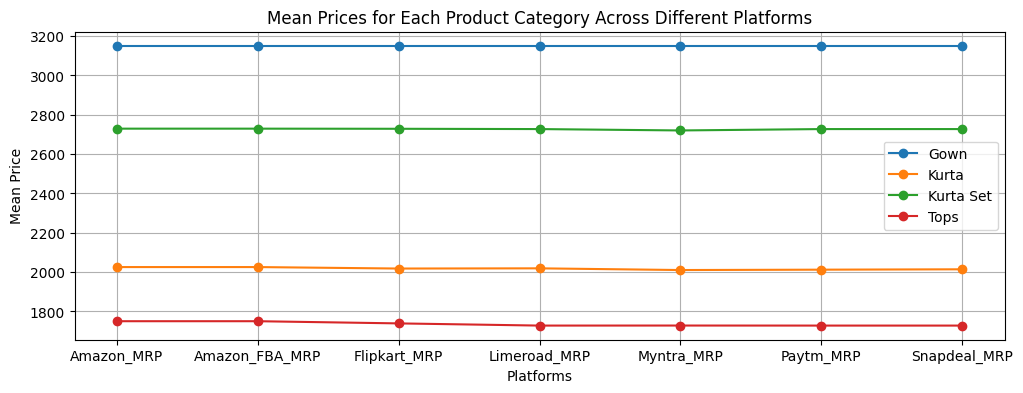

In [ ]:
mean_ds = pd.DataFrame(mean_values_ds)

plt.figure(figsize=(12, 4))
for category in mean_ds.index:
    plt.plot(mean_ds.columns, mean_ds.loc[category], marker='o', label=category)

plt.title('Mean Prices for Each Product Category Across Different Platforms')
plt.xlabel('Platforms')
plt.ylabel('Mean Price')
plt.legend()
plt.grid(True)
plt.show()

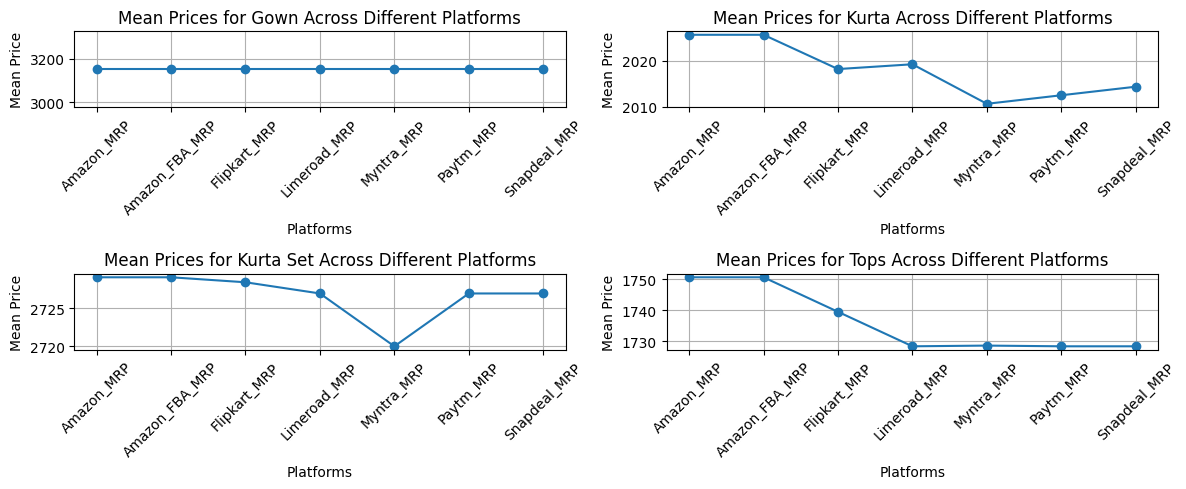

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

categories = mean_ds.index
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    ax.plot(mean_ds.columns, mean_ds.loc[category], marker='o')
    ax.set_title(f'Mean Prices for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Mean Price')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

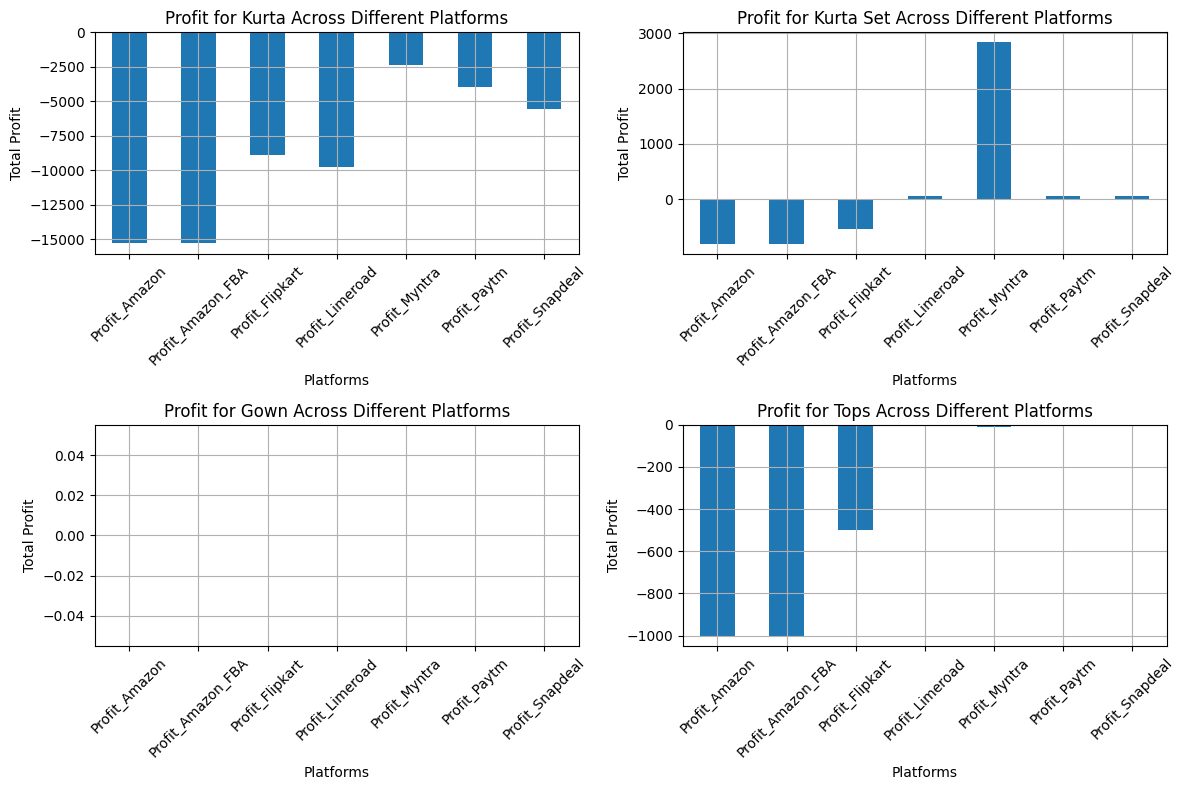

In [ ]:
profit_ds = {}
columns = ['Profit_Amazon', 'Profit_Amazon_FBA', 'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra', 'Profit_Paytm', 'Profit_Snapdeal']
for column in columns:
    profit_ds[column] = round(ds.groupby('Product_Category')[column].sum(),2)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
profit_ds = pd.DataFrame(profit_ds)

categories = ['Kurta', 'Kurta Set', 'Gown', 'Tops']
for i, category in enumerate(categories):
    ax = axes[i//2, i%2]
    profit_ds.loc[category].plot(kind='bar', ax=ax)
    ax.set_title(f'Profit for {category} Across Different Platforms')
    ax.set_xlabel('Platforms')
    ax.set_ylabel('Total Profit')
    ax.tick_params(axis='x', rotation=45)  
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
total_profit_ds = {
    'Amazon': ds['Profit_Amazon'].sum(),
    'Amazon_FBA': ds['Profit_Amazon_FBA'].sum(),
    'Flipkart': ds['Profit_Flipkart'].sum(),
    'Limeroad': ds['Profit_Limeroad'].sum(),
    'Myntra': ds['Profit_Myntra'].sum(),
    'Paytm': ds['Profit_Paytm'].sum(),
    'Snapdeal': ds['Profit_Snapdeal'].sum()
}

df_total_profit = pd.DataFrame(list(total_profit_ds.items()), columns=['Platform', 'Total Profit'])
print(df_total_profit)

     Platform  Total Profit
0      Amazon -17081.333333
1  Amazon_FBA -17081.333333
2    Flipkart  -9902.333333
3    Limeroad  -9714.333333
4      Myntra    459.666667
5       Paytm  -3914.333333
6    Snapdeal  -5514.333333


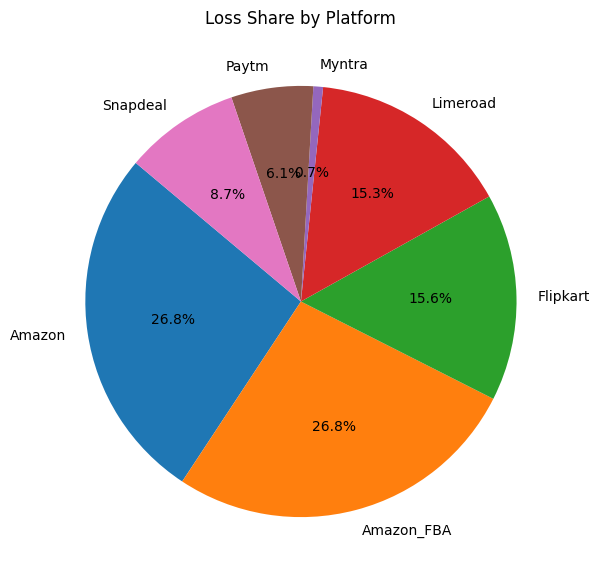

In [ ]:
df_total_profit.loc[df_total_profit['Total Profit'] < 0, 'Total Profit'] *= -1
df_total_profit['Total Profit'] = pd.to_numeric(total_profit_df['Total Profit'], errors='coerce')

loss_ds = df_total_profit[df_total_profit['Platform'] != 'Profit_Myntra']

plt.figure(figsize=(10, 7))
plt.pie(loss_ds['Total Profit'], labels=loss_ds['Platform'], autopct='%1.1f%%', startangle=140)
plt.title('Loss Share by Platform')
plt.show()

In [ ]:
mean_profit_ds = {
    'Amazon': ds['Profit_Amazon'].mean(),
    'Amazon_FBA': ds['Profit_Amazon_FBA'].mean(),
    'Flipkart': ds['Profit_Flipkart'].mean(),
    'Limeroad': ds['Profit_Limeroad'].mean(),
    'Myntra': ds['Profit_Myntra'].mean(),
    'Paytm': ds['Profit_Paytm'].mean(),
    'Snapdeal': ds['Profit_Snapdeal'].mean()
}

df_mean_profit = pd.DataFrame(list(mean_profit_ds.items()), columns=['Platform', 'Total Profit'])
print(df_mean_profit)

     Platform  Total Profit
0      Amazon    -12.843108
1  Amazon_FBA    -12.843108
2    Flipkart     -7.445363
3    Limeroad     -7.304010
4      Myntra      0.345614
5       Paytm     -2.943108
6    Snapdeal     -4.146115


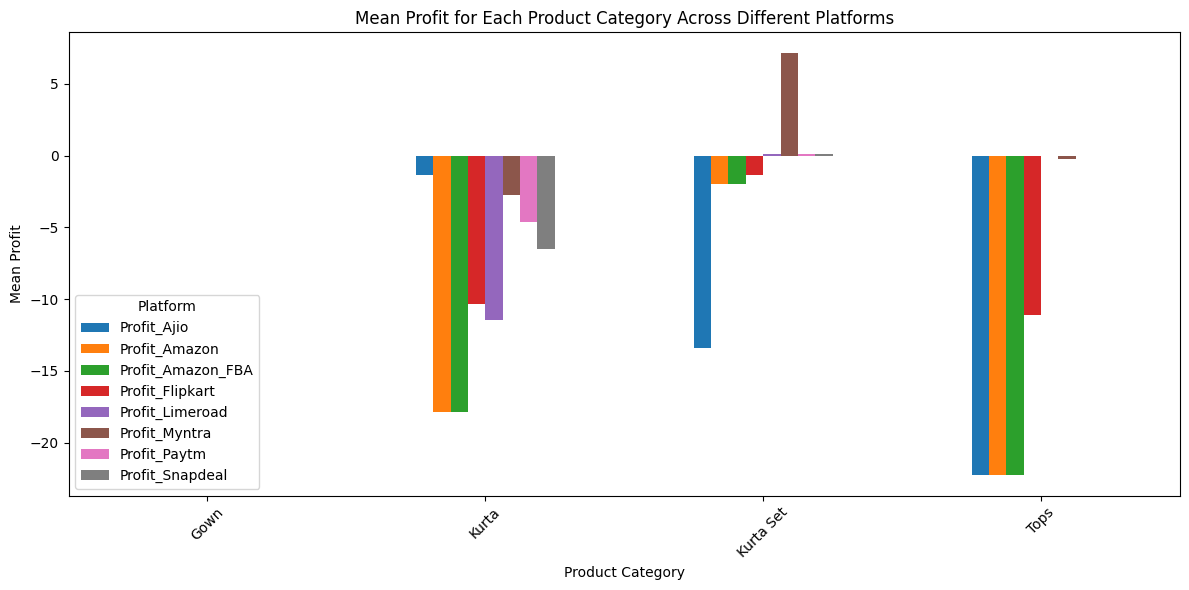

In [ ]:
ds_mean_profit = ds.groupby('Product_Category')[['Profit_Ajio', 'Profit_Amazon', 'Profit_Amazon_FBA', 'Profit_Flipkart', 'Profit_Limeroad', 'Profit_Myntra', 'Profit_Paytm', 'Profit_Snapdeal']].mean()

ds_mean_profit.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Profit for Each Product Category Across Different Platforms')
plt.xlabel('Product Category')
plt.ylabel('Mean Profit')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

Analyzing Both datasets

In [ ]:
March_prices = {}
May_prices = {}
columns = ['Kurta', 'Kurta Set', 'Gown', 'Tops']
for column in columns:
    March_prices[column] = round(ds[ds['Product_Category'] == column]['Final_Old_MRP'].mean(),2)
    May_prices[column] = round(df[df['Product_Category'] == column]['Final_Old_MRP'].mean(),2)
print(March_prices)
print(May_prices)

{'Kurta': 2007.82, 'Kurta Set': 2727.09, 'Gown': 3151.25, 'Tops': 1728.33}
{'Kurta': 2011.32, 'Kurta Set': 2727.09, 'Gown': 3151.25, 'Tops': 1728.33}


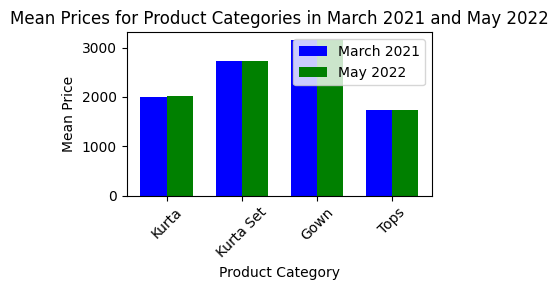

In [ ]:
data = {
    'Category': ['Kurta', 'Kurta Set', 'Gown', 'Tops'],
    'March_2021': [2007.82, 2727.09, 3151.25, 1728.33],
    'May_2022': [2011.32, 2727.09, 3151.25, 1728.33]
}
data = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(4, 3))

bar_width = 0.35
index = range(len(data['Category']))

bar1 = ax.bar(index, data['March_2021'], bar_width, label='March 2021', color='b')
bar2 = ax.bar([i + bar_width for i in index], data['May_2022'], bar_width, label='May 2022', color='g')

ax.set_xlabel('Product Category')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Prices for Product Categories in March 2021 and May 2022')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['Category'])
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dropping columns:

In [ ]:
May_ds = pd.read_csv("/kaggle/input/may-2022/May-2022.csv")
March_ds = pd.read_csv("/kaggle/input/p-l-march-2021/P  L March 2021.csv")
May_ds.replace('Nill', np.nan, inplace=True)
May_ds.replace('#VALUE!', np.nan, inplace=True)

March_ds.replace('Nill', np.nan, inplace=True)
March_ds.replace('#VALUE!', np.nan, inplace=True)
March_ds.rename(columns=lambda x: x.strip(), inplace=True)
print(May_ds.info())
March_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1257 non-null   object
 4   Product_Category  1257 non-null   object
 5   Product_Weight    1257 non-null   object
 6   Transfer_Price    1324 non-null   object
 7   Old_MRP           1293 non-null   object
 8   Final_Old_MRP     1293 non-null   object
 9   Ajio_MRP          1293 non-null   object
 10  Amazon_MRP        1293 non-null   object
 11  Amazon_FBA_MRP    1293 non-null   object
 12  Flipkart_MRP      1293 non-null   object
 13  Limeroad_MRP      1293 non-null   object
 14  Myntra_MRP        1299 non-null   object
 15  Paytm_MRP         1293 non-null   object
 16  Snapdeal_MRP      1293 non-null   object
dtypes: int64(1), o

In [ ]:
le_style = LabelEncoder()
le_catalog = LabelEncoder()

March_ds['Product_Style_ID_encoded'] = le_style.fit_transform(March_ds['Product_Style_ID'])
March_ds['Product_Catalog_encoded'] = le_catalog.fit_transform(March_ds['Product_Catalog'].astype(str))

train_data = March_ds[March_ds['Product_Catalog'].notnull()]
test_data = March_ds[March_ds['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    March_ds.loc[March_ds['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [ ]:
May_ds['Product_Style_ID_encoded'] = le_style.fit_transform(May_ds['Product_Style_ID'])
May_ds['Product_Catalog_encoded'] = le_catalog.fit_transform(May_ds['Product_Catalog'].astype(str))

train_data = May_ds[May_ds['Product_Catalog'].notnull()]
test_data = May_ds[May_ds['Product_Catalog'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded']]
    y_train = train_data['Product_Catalog_encoded']
    X_test = test_data[['Product_Style_ID_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_catalogs = knn.predict(X_test)
    predicted_catalogs_decoded = le_catalog.inverse_transform(predicted_catalogs)

    May_ds.loc[May_ds['Product_Catalog'].isnull(), 'Product_Catalog'] = predicted_catalogs_decoded

In [ ]:
le_category = LabelEncoder()

March_ds['Product_Category_encoded'] = le_category.fit_transform(March_ds['Product_Category'].astype(str))

train_data = March_ds[March_ds['Product_Category'].notnull()]
test_data = March_ds[March_ds['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    March_ds.loc[March_ds['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [ ]:
May_ds['Product_Category_encoded'] = le_category.fit_transform(May_ds['Product_Category'].astype(str))

train_data = May_ds[May_ds['Product_Category'].notnull()]
test_data = May_ds[May_ds['Product_Category'].isnull()]

if not train_data.empty and not test_data.empty:
    X_train = train_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]
    y_train = train_data['Product_Category_encoded']
    X_test = test_data[['Product_Style_ID_encoded', 'Product_Catalog_encoded']]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    predicted_categories = knn.predict(X_test)
    predicted_categories_decoded = le_category.inverse_transform(predicted_categories)

    May_ds.loc[May_ds['Product_Category'].isnull(), 'Product_Category'] = predicted_categories_decoded

In [ ]:
weight_mapping = {
    'Gown': 0.4,
    'Kurta Set': 0.4,
    'Kurta': 0.3,
    'Tops': 0.2
}

March_ds['Product_Weight'] = March_ds.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)
May_ds['Product_Weight'] = May_ds.apply(
    lambda row: weight_mapping[row['Product_Category']] if pd.isnull(row['Product_Weight']) and row['Product_Category'] in weight_mapping else row['Product_Weight'],
    axis=1
)

In [ ]:
March_ds.drop(columns=['Product_Style_ID_encoded', 'Product_Category_encoded', 'Product_Catalog_encoded'], inplace=True)
May_ds.drop(columns=['Product_Style_ID_encoded', 'Product_Category_encoded', 'Product_Catalog_encoded'], inplace=True)

In [ ]:
March_ds = March_ds.dropna(axis=0, how='any')
May_ds = May_ds.dropna(axis=0, how='any')

In [ ]:
March_ds['Transfer_Price_Level_1'] = pd.to_numeric(March_ds['Transfer_Price_Level_1'], errors='coerce')
March_ds['Transfer_Price_Level_2'] = pd.to_numeric(March_ds['Transfer_Price_Level_2'], errors='coerce')
March_ds['Old_MRP'] = pd.to_numeric(March_ds['Old_MRP'], errors='coerce')
March_ds['Final_Old_MRP'] =pd.to_numeric(March_ds['Final_Old_MRP'], errors='coerce')
March_ds['Ajio_MRP'] = pd.to_numeric(March_ds['Ajio_MRP'], errors='coerce')
March_ds['Amazon_MRP'] = pd.to_numeric(March_ds['Amazon_MRP'], errors='coerce')
March_ds['Amazon_FBA_MRP'] = pd.to_numeric(March_ds['Amazon_FBA_MRP'], errors='coerce')
March_ds['Flipkart_MRP'] = pd.to_numeric(March_ds['Flipkart_MRP'], errors='coerce')
March_ds['Limeroad_MRP'] = pd.to_numeric(March_ds['Limeroad_MRP'], errors='coerce')
March_ds['Myntra_MRP'] = pd.to_numeric(March_ds['Myntra_MRP'], errors='coerce')
March_ds['Paytm_MRP'] = pd.to_numeric(March_ds['Paytm_MRP'], errors='coerce')
March_ds['Snapdeal_MRP'] = pd.to_numeric(March_ds['Snapdeal_MRP'], errors='coerce')
March_ds['Product_Weight'] = pd.to_numeric(March_ds['Product_Weight'], errors='coerce')

In [ ]:
May_ds['Transfer_Price'] = pd.to_numeric(May_ds['Transfer_Price'], errors='coerce')
May_ds['Old_MRP'] = pd.to_numeric(May_ds['Old_MRP'], errors='coerce')
May_ds['Final_Old_MRP'] =pd.to_numeric(May_ds['Final_Old_MRP'], errors='coerce')
May_ds['Ajio_MRP'] = pd.to_numeric(May_ds['Ajio_MRP'], errors='coerce')
May_ds['Amazon_MRP'] = pd.to_numeric(May_ds['Amazon_MRP'], errors='coerce')
May_ds['Amazon_FBA_MRP'] = pd.to_numeric(May_ds['Amazon_FBA_MRP'], errors='coerce')
May_ds['Flipkart_MRP'] = pd.to_numeric(May_ds['Flipkart_MRP'], errors='coerce')
May_ds['Limeroad_MRP'] = pd.to_numeric(May_ds['Limeroad_MRP'], errors='coerce')
May_ds['Myntra_MRP'] = pd.to_numeric(May_ds['Myntra_MRP'], errors='coerce')
May_ds['Paytm_MRP'] = pd.to_numeric(May_ds['Paytm_MRP'], errors='coerce')
May_ds['Snapdeal_MRP'] = pd.to_numeric(May_ds['Snapdeal_MRP'], errors='coerce')
May_ds['Product_Weight'] = pd.to_numeric(May_ds['Product_Weight'], errors='coerce')

In [ ]:
print(March_ds.info())
May_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1293 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1293 non-null   int64  
 1   Product_SKU             1293 non-null   object 
 2   Product_Style_ID        1293 non-null   object 
 3   Product_Catalog         1293 non-null   object 
 4   Product_Category        1293 non-null   object 
 5   Product_Weight          1293 non-null   float64
 6   Transfer_Price_Level_1  1293 non-null   float64
 7   Transfer_Price_Level_2  1293 non-null   float64
 8   Old_MRP                 1293 non-null   float64
 9   Final_Old_MRP           1293 non-null   float64
 10  Ajio_MRP                1293 non-null   float64
 11  Amazon_MRP              1293 non-null   float64
 12  Amazon_FBA_MRP          1293 non-null   float64
 13  Flipkart_MRP            1293 non-null   float64
 14  Limeroad_MRP            1293 non-null   float

In [ ]:
March_prices = {}
May_prices = {}
columns = ['Kurta', 'Kurta Set', 'Gown', 'Tops']
for column in columns:
    March_prices[column] = round(March_ds[March_ds['Product_Category'] == column]['Final_Old_MRP'].mean(),2)
    May_prices[column] = round(May_ds[May_ds['Product_Category'] == column]['Final_Old_MRP'].mean(),2)
print(March_prices)
print(May_prices)

{'Kurta': 2002.25, 'Kurta Set': 2732.41, 'Gown': 3151.25, 'Tops': 1728.33}
{'Kurta': 2002.25, 'Kurta Set': 2732.41, 'Gown': 3151.25, 'Tops': 1728.33}


In [8]:
warehouse_df = pd.read_csv('data/Cloud Warehouse Compersion Chart.csv')
expense_df = pd.read_csv('data/Expense IIGF.csv')
may_df = pd.read_csv('data/May-2022.csv')
pl_df = pd.read_csv('data/P  L March 2021.csv')
sales_df = pd.read_csv('data/Sale Report.csv')
int_sales_df = pd.read_csv('data/International sale Report.csv')
amazon = pd.read_csv('data/Amazon Sale Report.csv')

# CLOUD WAREHOUSE COMPERSION CHART (EXPLORED IN EXCEL)

# INTERNATIONAL SALE REPORT

In [ ]:
int_sales_df = pd.read_csv('data/International sale Report.csv')

In [ ]:
int_sales_df.head()

index Sale_Date Sale_Month       Customer_Name Product_Style  \
0      0  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004   
1      1  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004   
2      2  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004   
3      3  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5009   
4      4  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5011   

      Product_SKU Product_Size Quantity_Purchased Price_per_Unit Gross_Amount  
0    MEN5004-KR-L            L                  1         616.56          617  
1   MEN5004-KR-XL           XL                  1         616.56          617  
2  MEN5004-KR-XXL          XXL                  1         616.56          617  
3    MEN5009-KR-L            L                  1         616.56          617  
4    MEN5011-KR-L            L                  1         616.56          617

In [ ]:
def is_date(string):
    try:
        if pd.isna(string):
            return False
        parse(str(string))
        return True
    except (ValueError, TypeError):
        return False

# Counting date and non-date values
date_count = int_sales_df['Sale_Date'].apply(is_date).sum()
non_date_count = len(int_sales_df) - date_count

print(f"Number of date values: {date_count}")
print(f"Number of non-date values: {non_date_count}")
print("Length of the DataFrame:", len(int_sales_df))

Number of date values: 18643
Number of non-date values: 18789
Length of the DataFrame: 37432


In [ ]:
# Reading each section of the dataset seperately

sales_data = pd.read_csv('data/International sale Report.csv', header=None, nrows=18664, skiprows=1)
sales_data.columns = ['index', 'Sale_Date', 'Sale_Month', 'Customer_Name', 'Product_Style', 'Product_SKU', 'Product_Size', 'Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount']
sales_data = sales_data.dropna(axis=1, how='all')

sku_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=18637, nrows=22, usecols=range(1,2))
sku_data.columns = ['SKU']
sku_data = sku_data.dropna(axis=1, how='all')

style_stock_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=18662, nrows=1014, usecols=range(1,3))
style_stock_data.columns = ['Style', 'Stock']
style_stock_data = style_stock_data.dropna(axis=1, how='all')

detailed_sales_data = pd.read_csv('data/International sale Report.csv', header=None, skiprows=19678, usecols=range(1,10))
detailed_sales_data.columns = ['CUSTOMER', 'DATE', 'Months', 'Style', 'SKU', 'PCS', 'RATE', 'GROSS AMT', 'Stock']
detailed_sales_data = detailed_sales_data.dropna(axis=1, how='all')

In [ ]:
sales_data

index Sale_Date Sale_Month       Customer_Name Product_Style  \
0          0  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004   
1          1  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004   
2          2  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5004   
3          3  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5009   
4          4  6/5/2021     21-Jun  REVATHY LOGANATHAN       MEN5011   
...      ...       ...        ...                 ...           ...   
18659  18659       NaN        NaN                 NaN           NaN   
18660  18660     Style      Stock                 NaN           NaN   
18661  18661   MEN5004         43                 NaN           NaN   
18662  18662   MEN5009         55                 NaN           NaN   
18663  18663   MEN5011         53                 NaN           NaN   

          Product_SKU Product_Size  Quantity_Purchased  Price_per_Unit  \
0        MEN5004-KR-L            L                 1.0          616.56   
1       MEN5004-KR-XL           XL                 1.0          616.56   
2      MEN5004-KR-XXL          XXL                 1.0          616.56   
3        MEN5009-KR-L            L                 1.0          616.56   
4        MEN5011-KR-L            L                 1.0          616.56   
...               ...          ...                 ...             ...   
18659             NaN          NaN                 NaN             NaN   
18660             NaN          NaN                 NaN             NaN   
18661             NaN          NaN                 NaN             NaN   
18662             NaN          NaN                 NaN             NaN   
18663             NaN          NaN                 NaN             NaN   

       Gross_Amount  
0             617.0  
1             617.0  
2             617.0  
3             617.0  
4             617.0  
...             ...  
18659           NaN  
18660           NaN  
18661           NaN  
18662           NaN  
18663           NaN  

[18664 rows x 10 columns]

In [ ]:
sku_data

SKU
0   JNE3826
1   JNE3827
2   JNE3828
3   JNE3853
4   JNE3855
5   JNE3858
6   JNE3829
7   JNE3830
8   JNE3849
9   JNE3852
10  JNE3848
11  JNE3831
12  JNE3851
13  JNE3832
14  JNE3850
15  JNE3839
16  JNE3840
17  JNE3844
18  JNE3845
19  JNE3846
20  JNE3847
21  JNE3843

In [ ]:
style_stock_data

Style  Stock
0     MEN5004     43
1     MEN5009     55
2     MEN5011     53
3     MEN5025     34
4     MEN5015    119
...       ...    ...
1009    J0419    313
1010  JNE3905    299
1011   23-Jan      0
1012    J0391    270
1013    J0390    240

[1014 rows x 2 columns]

In [ ]:
detailed_sales_data

CUSTOMER       DATE  Months     Style              SKU  PCS  \
0      REVATHY LOGANATHAN   6/5/2021  21-Jun   MEN5004    MEN5004-KR-XL    1   
1      REVATHY LOGANATHAN   6/5/2021  21-Jun   MEN5004   MEN5004-KR-XXL    1   
2      REVATHY LOGANATHAN   6/5/2021  21-Jun   MEN5009     MEN5009-KR-L    1   
3      REVATHY LOGANATHAN   6/5/2021  21-Jun   MEN5011     MEN5011-KR-L    1   
4      REVATHY LOGANATHAN   6/5/2021  21-Jun   MEN5025     MEN5025-KR-L    1   
...                   ...        ...     ...       ...              ...  ...   
17750              AVIN    3/31/2022  22-Mar  PJNE3423  PJNE3423-KR-4XL    1   
17751              AVIN    3/31/2022  22-Mar  PJNE3404  PJNE3404-KR-4XL    1   
17752              AVIN    3/31/2022  22-Mar  PJNE3423  PJNE3423-KR-4XL    1   
17753              AVIN    3/31/2022  22-Mar    SET290  SET290-KR-DPT-M    1   
17754              AVIN    3/31/2022  22-Mar  SHIPPING         SHIPPING    1   

          RATE  GROSS AMT  Stock  
0       616.56        617      4  
1       616.56        617      6  
2       616.56        617      6  
3       616.56        617     11  
4       649.03        649      6  
...        ...        ...    ...  
17750   537.50        538      4  
17751   500.00        500      5  
17752   537.50        538      4  
17753   812.50        812      7  
17754  3666.00       3666      0  

[17755 rows x 9 columns]

In [ ]:
# Handling missing values for sales data
sales_data.drop(columns=['index', 'Category'], errors='ignore', inplace=True)
sales_data['Sale_Date'] = pd.to_datetime(sales_data['Sale_Date'], format='%m/%d/%Y', errors='coerce').dt.strftime('%d-%m-%Y')
sales_data['Sale_Month'] = pd.to_datetime(sales_data['Sale_Month'], format='%y-%b', errors='coerce').dt.strftime('%Y-%m')
numeric_cols = ['Quantity_Purchased', 'Gross_Amount', 'Price_per_Unit']
sales_data[numeric_cols] = sales_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
sales_data['Customer_Name'] = sales_data['Customer_Name'].str.replace('MR.', 'MR ', regex=False).str.strip()
sales_data.dropna(subset=['Sale_Month', 'Product_Size', 'Product_Style', 'Customer_Name', 'Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount'], inplace=True) # Dropping rows with missing values since theyt are less than 1% of the data
sales_data['Product_SKU'].fillna('Unknown')

# Handling missing values for style-stock data 
style_stock_data['Stock'] = pd.to_numeric(style_stock_data['Stock'], errors='coerce').fillna(0)

# Handling missing values for detailed sales data
detailed_numeric_cols = ['PCS', 'RATE', 'GROSS AMT']
detailed_sales_data[detailed_numeric_cols] = detailed_sales_data[detailed_numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:
# Sales Trend Analysis
total_sales = sales_data['Quantity_Purchased'].sum()
daily_sales = sales_data.groupby('Sale_Date')['Quantity_Purchased'].sum()
monthly_sales = sales_data.groupby('Sale_Month')['Quantity_Purchased'].sum()

# Top Selling Products
top_products = sales_data.groupby('Product_SKU')['Quantity_Purchased'].sum().sort_values().head(10)

# Customer Analysis
top_customers = sales_data.groupby('Customer_Name')['Gross_Amount'].sum().sort_values().head(5)

# Product Category Performance
sales_data['Category'] = sales_data['Product_SKU']
category_sales = sales_data.groupby('Category')['Quantity_Purchased'].sum().sort_values()

# Size Distribution
size_distribution = sales_data.groupby('Product_Size')['Quantity_Purchased'].sum().sort_values()

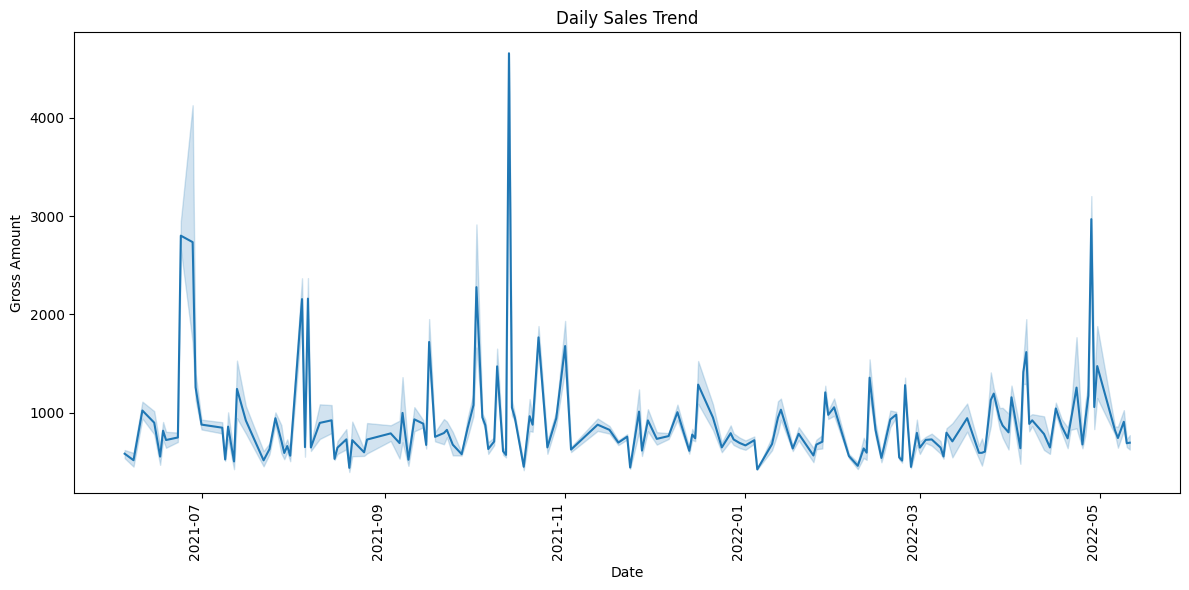

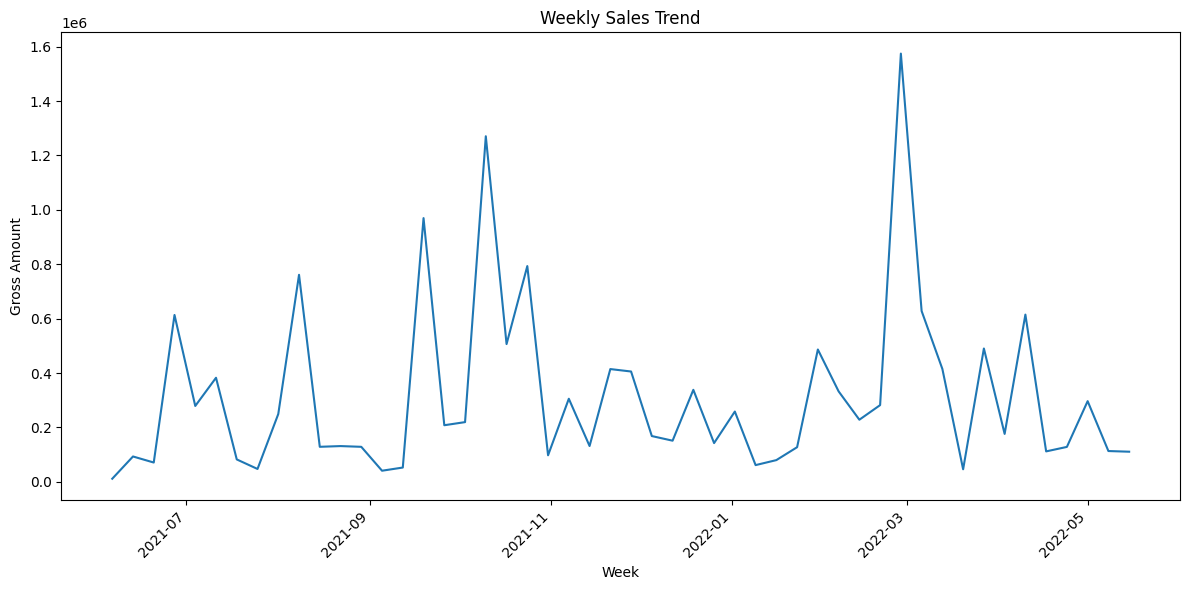

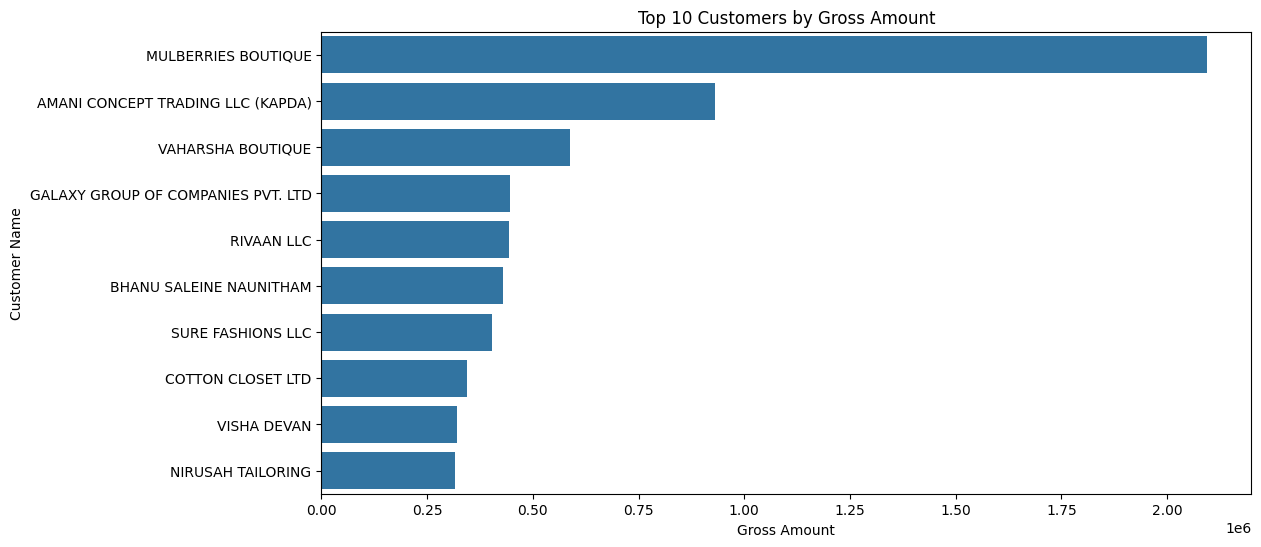

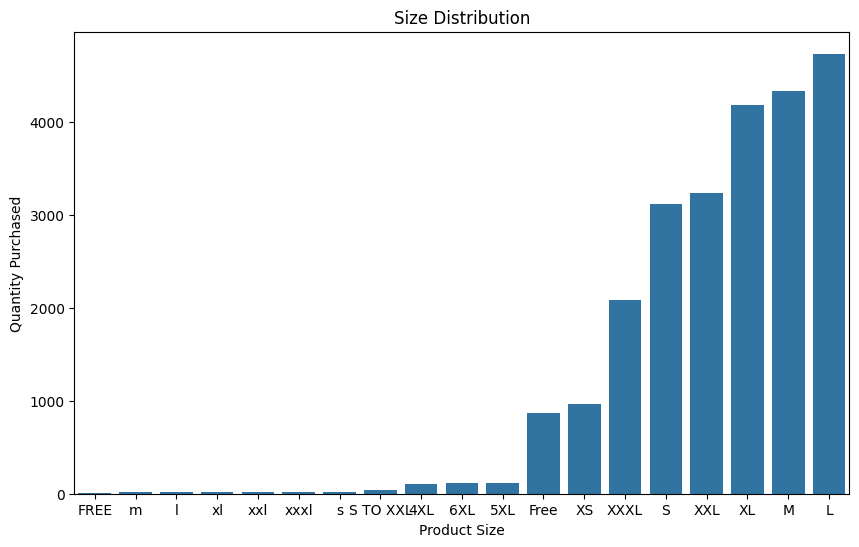

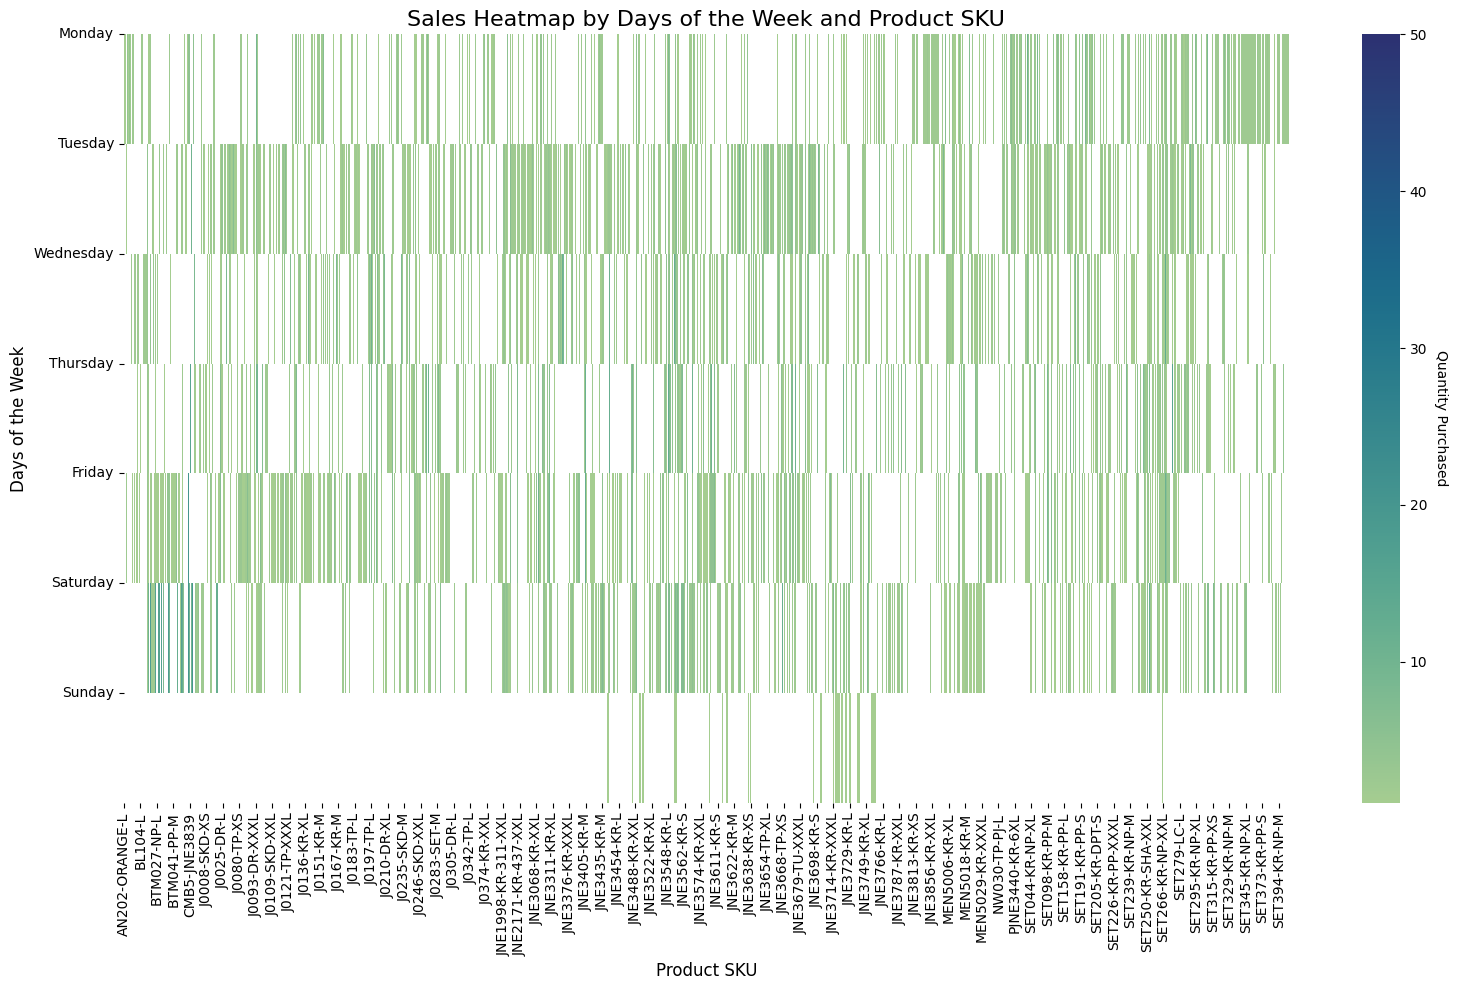

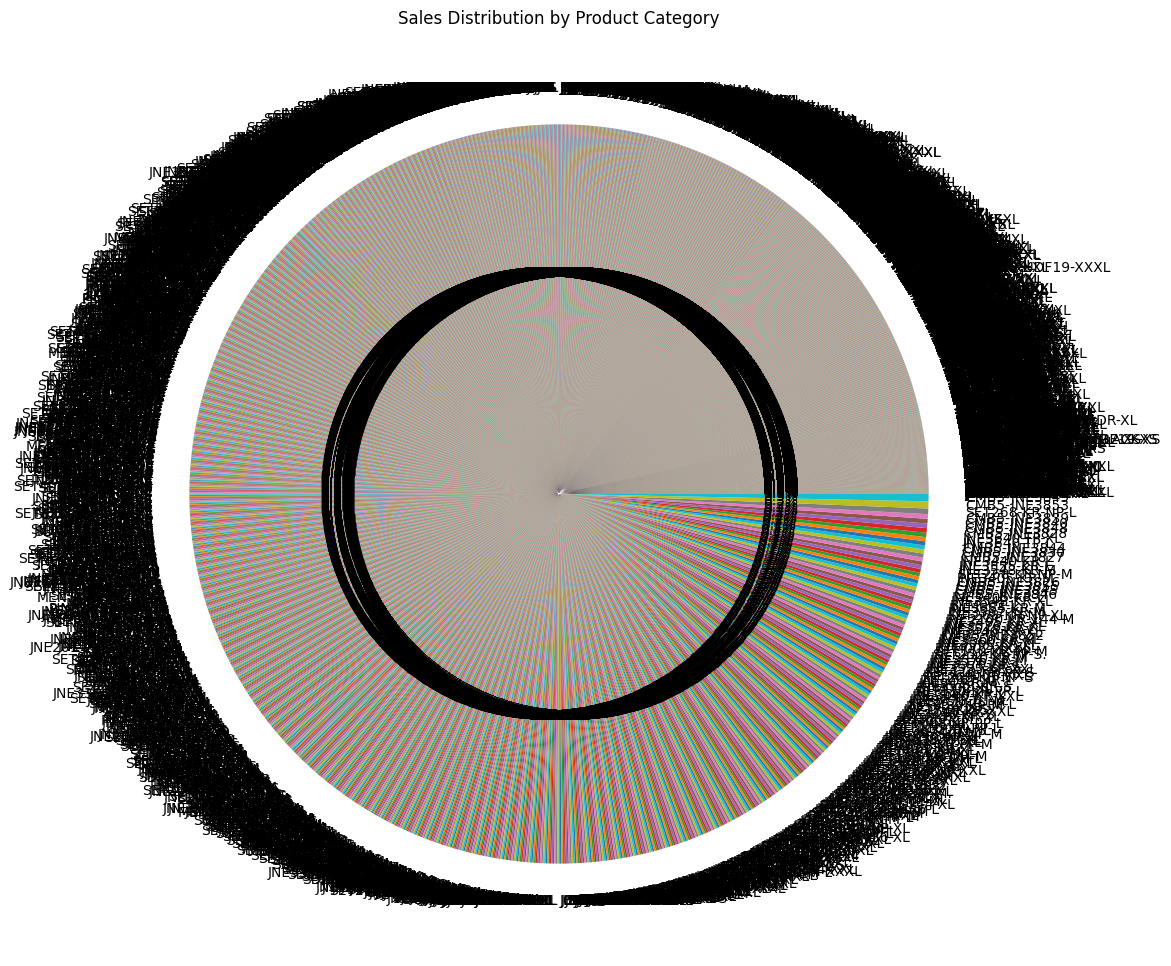

Total sales: $15,768,162.19
Average order value: $846.16
Best selling month: 2021-10 ($2,865,134.00)
Worst selling month: 2022-05 ($224,483.44)


In [ ]:

# Sales Trend Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sale_Date', y='Gross_Amount', data=sales_data)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Gross Amount')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Weekly Sales Trend
weekly_sales = sales_data.resample('W', on='Sale_Date').sum(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales['Gross_Amount'])
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Gross Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Customer Analysis
top_customers = sales_data.groupby('Customer_Name')['Gross_Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Gross Amount')
plt.xlabel('Gross Amount')
plt.ylabel('Customer Name')
plt.show()

# Size Distribution
size_distribution = sales_data.groupby('Product_Size')['Quantity_Purchased'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=size_distribution.index, y=size_distribution.values)
plt.title('Size Distribution')
plt.xlabel('Product Size')
plt.ylabel('Quantity Purchased')
plt.show()

# Sales Heatmap by Day of Week and Product_SKU
pivot = sales_data.pivot_table(values='Quantity_Purchased', index=pd.to_datetime(sales_data['Sale_Date'],format='%d-%m-%Y').dt.dayofweek, columns='Product_SKU', aggfunc='sum')
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(pivot, cmap='crest', annot=False)
plt.title('Sales Heatmap by Days of the Week and Product SKU', fontsize=16)
plt.xlabel('Product SKU', fontsize=12)
plt.ylabel('Days of the Week', fontsize=12)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(range(7), day_names, rotation=0)
plt.xticks(rotation=90)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Quantity Purchased', rotation=270, labelpad=15)
plt.tight_layout()
plt.show()

# Sales Distribution by Product Category(SKU)
plt.figure(figsize=(20, 12))
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Product Category')
plt.show()

# Additional Insights
monthly_sales = sales_data.groupby('Sale_Month')['Gross_Amount'].sum()
print(f"Total sales: ${sales_data['Gross_Amount'].sum():,.2f}")
print(f"Average order value: ${sales_data['Gross_Amount'].mean():,.2f}")
print(f"Best selling month: {monthly_sales.idxmax()} (${monthly_sales.max():,.2f})")
print(f"Worst selling month: {monthly_sales.idxmin()} (${monthly_sales.min():,.2f})")

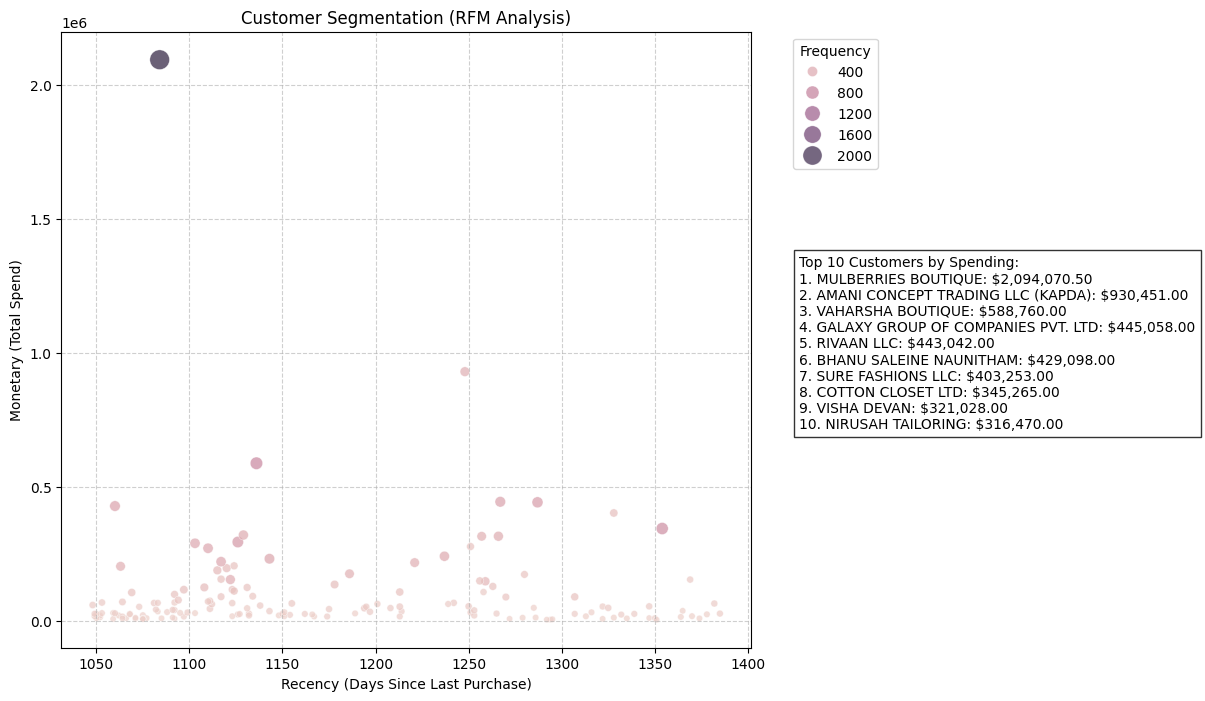

In [ ]:
# Compute RFM metrics
rfm = sales_data.groupby('Customer_Name').agg({
    'Sale_Date': lambda x: (pd.to_datetime('today') - pd.to_datetime(x.max())).days,  # Recency
    'Customer_Name': 'count',  # Frequency
    'Gross_Amount': 'sum'  # Monetary
}).rename(columns={'Sale_Date': 'Recency', 'Customer_Name': 'Frequency', 'Gross_Amount': 'Monetary'})

rfm['Recency'] = rfm['Recency'].astype(int)

# Identify Top 10 Customers by Monetary Value (Spending)
top_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Scatter
scatter = sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Frequency', size='Frequency', sizes=(20, 200), alpha=0.7, ax=ax)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.6)

# Titles and Labels
ax.set_title("Customer Segmentation (RFM Analysis)")
ax.set_xlabel("Recency (Days Since Last Purchase)")
ax.set_ylabel("Monetary (Total Spend)")

# Move the legend outside the plot
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')

# Create a second text box below the legend
top_text = "\n".join([f"{i+1}. {name}: ${value:,.2f}" for i, (name, value) in enumerate(top_customers['Monetary'].items())])

# Adjust y-position to align it just below the legend
fig.text(0.74, 0.6, f"Top 10 Customers by Spending:\n{top_text}", 
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8), va='top')

# Adjust layout to make space for the legend and text box
plt.subplots_adjust(right=0.7)

# Show the plot
plt.show()

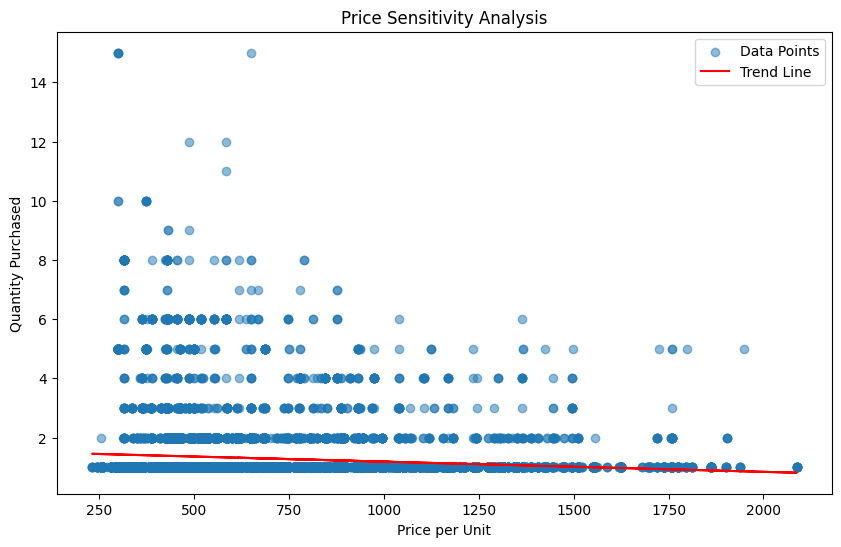

In [ ]:
x = sales_data['Price_per_Unit']
y = sales_data['Quantity_Purchased']
# Fit a linear regression model (y = mx + c)
m, c = np.polyfit(x, y, 1)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label="Data Points")
plt.plot(x, m*x + c, color='red', label="Trend Line")  # Plot the fitted line
plt.title("Price Sensitivity Analysis")
plt.xlabel("Price per Unit")
plt.ylabel("Quantity Purchased")
plt.legend()
plt.show()

# AMAZON SALES DATA

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.1 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 3.3 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 3.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 3.4 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 3.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.4 MB/s eta 0:00:02
   ----------------------------- ---------- 8.1/11.1 MB 3.4 MB/s eta 0:00:01
   -----------------

In [ ]:
import pandas as pd

In [ ]:
amazon=pd.read_csv("data/Original CSV/Amazon Sale Report.csv")

In [ ]:
print(amazon.shape)

(128975, 23)


In [ ]:
print(amazon.head())

   index             Order_ID Order_Date                  Order_Status  \
0      0  405-8078784-5731545  4/30/2022                     Cancelled   
1      1  171-9198151-1101146  4/30/2022  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  4/30/2022                       Shipped   
3      3  403-9615377-8133951  4/30/2022                     Cancelled   
4      4  407-1069790-7240320  4/30/2022                       Shipped   

  Fulfillment_Type Sales_Channel Shipping_Service_Level Product_Style  \
0         Merchant     Amazon.in               Standard        SET389   
1         Merchant     Amazon.in               Standard       JNE3781   
2           Amazon     Amazon.in              Expedited       JNE3371   
3         Merchant     Amazon.in               Standard         J0341   
4           Amazon     Amazon.in              Expedited       JNE3671   

       Product_SKU Product_Category  ... Quantity Currency Sale_Amount  \
0   SET389-KR-NP-S              Set  ...  

In [ ]:
print(amazon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   128975 non-null  int64  
 1   Order_ID                128975 non-null  object 
 2   Order_Date              128975 non-null  object 
 3   Order_Status            128975 non-null  object 
 4   Fulfillment_Type        128975 non-null  object 
 5   Sales_Channel           128975 non-null  object 
 6   Shipping_Service_Level  128975 non-null  object 
 7   Product_Style           128975 non-null  object 
 8   Product_SKU             128975 non-null  object 
 9   Product_Category        128975 non-null  object 
 10  Product_Size            128975 non-null  object 
 11  Amazon_Standard_ID      128975 non-null  object 
 12  Courier_Status          122103 non-null  object 
 13  Quantity                128975 non-null  int64  
 14  Currency            

In [ ]:
amazon.dtypes

index                       int64
Order_ID                   object
Order_Date                 object
Order_Status               object
Fulfillment_Type           object
Sales_Channel              object
Shipping_Service_Level     object
Product_Style              object
Product_SKU                object
Product_Category           object
Product_Size               object
Amazon_Standard_ID         object
Courier_Status             object
Quantity                    int64
Currency                   object
Sale_Amount               float64
Shipping_City              object
Shipping_State             object
Shipping_Postal_Code      float64
Shipping_Country           object
Promotion_IDs              object
Business_to_Business         bool
Fulfilled_By               object
dtype: object

In [ ]:
print(amazon.isnull().sum())

index                         0
Order_ID                      0
Order_Date                    0
Order_Status                  0
Fulfillment_Type              0
Sales_Channel                 0
Shipping_Service_Level        0
Product_Style                 0
Product_SKU                   0
Product_Category              0
Product_Size                  0
Amazon_Standard_ID            0
Courier_Status             6872
Quantity                      0
Currency                   7795
Sale_Amount                7795
Shipping_City                33
Shipping_State               33
Shipping_Postal_Code         33
Shipping_Country             33
Promotion_IDs             49153
Business_to_Business          0
Fulfilled_By              89698
dtype: int64


Finding Percentage of missing values in each column

In [ ]:
missing_percentage = amazon.isnull().sum() / len(amazon) * 100
print(missing_percentage)

index                      0.000000
Order_ID                   0.000000
Order_Date                 0.000000
Order_Status               0.000000
Fulfillment_Type           0.000000
Sales_Channel              0.000000
Shipping_Service_Level     0.000000
Product_Style              0.000000
Product_SKU                0.000000
Product_Category           0.000000
Product_Size               0.000000
Amazon_Standard_ID         0.000000
Courier_Status             5.328164
Quantity                   0.000000
Currency                   6.043807
Sale_Amount                6.043807
Shipping_City              0.025586
Shipping_State             0.025586
Shipping_Postal_Code       0.025586
Shipping_Country           0.025586
Promotion_IDs             38.110487
Business_to_Business       0.000000
Fulfilled_By              69.546811
dtype: float64


Dropping Columns with large percentage of missing values

In [ ]:
amazon.drop('Fulfilled_By', axis=1, inplace=True)

In [ ]:
amazon.drop('Promotion_IDs', axis=1, inplace=True)

Imputation of missing values for remaing columns (int, float)

In [ ]:
def fill_na_based_on_skew(df, column):
    skewness = df[column].skew()

    if abs(skewness) > 1: 
        df[column].fillna(df[column].median(), inplace=True)
    else: 
        df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
fill_na_based_on_skew(amazon, 'Sale_Amount')

C:\Users\HP\AppData\Local\Temp\ipykernel_12396\3934627601.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Imputation of missing values for Categorical Columns

In [ ]:
def fill_categorical_missing(df, categorical_columns):
    total_rows = len(df)

    for col in categorical_columns:
        unique_count = df[col].nunique()
        cardinality_ratio = unique_count / total_rows  

        if cardinality_ratio < 0.05:  
            df[col].fillna(df[col].mode()[0], inplace=True)

        elif 0.05 <= cardinality_ratio <= 0.20:  
            if df[col].mode()[0] != "Unknown":  
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna("Unknown", inplace=True)

        else: 
            df[col].fillna("Unknown", inplace=True)

    return df

In [ ]:
def check_unique_values(df, column):
    print(f"Unique values in '{column}':")
    unique_values = df[column].dropna().unique() 
    for value in sorted(unique_values):
        print(repr(value)) 
    print(f"\nTotal unique values: {len(unique_values)}")

check_unique_values(amazon, 'Shipping_State')   

Unique values in 'Shipping_State':
'ANDAMAN & NICOBAR '
'ANDHRA PRADESH'
'APO'
'AR'
'ARUNACHAL PRADESH'
'ASSAM'
'Arunachal Pradesh'
'Arunachal pradesh'
'BIHAR'
'Bihar'
'CHANDIGARH'
'CHHATTISGARH'
'Chandigarh'
'DADRA AND NAGAR'
'DELHI'
'Delhi'
'GOA'
'Goa'
'Gujarat'
'HARYANA'
'HIMACHAL PRADESH'
'JAMMU & KASHMIR'
'JHARKHAND'
'KARNATAKA'
'KERALA'
'LADAKH'
'LAKSHADWEEP'
'MADHYA PRADESH'
'MAHARASHTRA'
'MANIPUR'
'MEGHALAYA'
'MIZORAM'
'Manipur'
'Meghalaya'
'Mizoram'
'NAGALAND'
'NL'
'Nagaland'
'New Delhi'
'ODISHA'
'Odisha'
'Orissa'
'PB'
'PUDUCHERRY'
'PUNJAB'
'Pondicherry'
'Puducherry'
'Punjab'
'Punjab/Mohali/Zirakpur'
'RAJASTHAN'
'RJ'
'Rajasthan'
'Rajshthan'
'Rajsthan'
'SIKKIM'
'Sikkim'
'TAMIL NADU'
'TELANGANA'
'TRIPURA'
'UTTAR PRADESH'
'UTTARAKHAND'
'WEST BENGAL'
'bihar'
'delhi'
'goa'
'orissa'
'punjab'
'rajasthan'
'rajsthan'

Total unique values: 69


In [ ]:
print(amazon[amazon['Shipping_State'] == 'AR']['Shipping_City'].unique())
print(amazon[amazon['Shipping_State'] == 'APO']['Shipping_City'].unique())
print(amazon[amazon['Shipping_State'] == 'NL']['Shipping_City'].unique())
print(amazon[amazon['Shipping_State'] == 'PB']['Shipping_City'].unique())
print(amazon[amazon['Shipping_State'] == 'RJ']['Shipping_City'].unique())

['ITANAGAR']
['APO']
['DIMAPUR']
['ZIRA']
['JAIPUR' 'JODHPUR']


In [ ]:
state_replacements = {
    'ANDAMAN & NICOBAR ': 'ANDAMAN & NICOBAR',
    'Arunachal Pradesh': 'ARUNACHAL PRADESH',
    'Arunachal pradesh': 'ARUNACHAL PRADESH',
    'Bihar': 'BIHAR',
    'Chandigarh': 'CHANDIGARH',
    'Delhi': 'DELHI',
    'Goa': 'GOA',
    'Gujarat': 'GUJARAT',
    'Manipur': 'MANIPUR',
    'Meghalaya': 'MEGHALAYA',
    'Mizoram': 'MIZORAM',
    'NL': 'NAGALAND',
    'Nagaland': 'NAGALAND',
    'New Delhi': 'DELHI',
    'Odisha': 'ODISHA',
    'Orissa': 'ODISHA',
    'PB': 'PUNJAB',
    'Pondicherry': 'PUDUCHERRY',
    'Puducherry': 'PUDUCHERRY',
    'Punjab': 'PUNJAB',
    'Punjab/Mohali/Zirakpur': 'PUNJAB',
    'RJ': 'RAJASTHAN',
    'Rajasthan': 'RAJASTHAN',
    'Rajshthan': 'RAJASTHAN',
    'Rajsthan': 'RAJASTHAN',
    'Sikkim': 'SIKKIM',
    'bihar': 'BIHAR',
    'delhi': 'DELHI',
    'goa': 'GOA',
    'orissa': 'ODISHA',
    'punjab': 'PUNJAB',
    'rajasthan': 'RAJASTHAN',
    'rajsthan': 'RAJASTHAN',
    'AR': 'ARUNACHAL PRADESH'
}

amazon['Shipping_State'] = amazon['Shipping_State'].replace(state_replacements)

amazon = amazon[~amazon['Shipping_State'].isin(['APO'])]

In [ ]:
categorical_cols=['Courier_Status','Currency','Shipping_State']

fill_categorical_missing(amazon, categorical_cols)

C:\Users\HP\AppData\Local\Temp\ipykernel_12396\3297095365.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


index             Order_ID Order_Date                  Order_Status  \
0            0  405-8078784-5731545  4/30/2022                     Cancelled   
1            1  171-9198151-1101146  4/30/2022  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  4/30/2022                       Shipped   
3            3  403-9615377-8133951  4/30/2022                     Cancelled   
4            4  407-1069790-7240320  4/30/2022                       Shipped   
...        ...                  ...        ...                           ...   
128970  128970  406-6001380-7673107  5/31/2022                       Shipped   
128971  128971  402-9551604-7544318  5/31/2022                       Shipped   
128972  128972  407-9547469-3152358  5/31/2022                       Shipped   
128973  128973  402-6184140-0545956  5/31/2022                       Shipped   
128974  128974  408-7436540-8728312  5/31/2022                       Shipped   

       Fulfillment_Type Sales_Channel Shipping_Service_Level Product_Style  \
0              Merchant     Amazon.in               Standard        SET389   
1              Merchant     Amazon.in               Standard       JNE3781   
2                Amazon     Amazon.in              Expedited       JNE3371   
3              Merchant     Amazon.in               Standard         J0341   
4                Amazon     Amazon.in              Expedited       JNE3671   
...                 ...           ...                    ...           ...   
128970           Amazon     Amazon.in              Expedited       JNE3697   
128971           Amazon     Amazon.in              Expedited        SET401   
128972           Amazon     Amazon.in              Expedited         J0157   
128973           Amazon     Amazon.in              Expedited         J0012   
128974           Amazon     Amazon.in              Expedited         J0003   

            Product_SKU Product_Category  ... Amazon_Standard_ID  \
0        SET389-KR-NP-S              Set  ...         B09KXVBD7Z   
1       JNE3781-KR-XXXL            kurta  ...         B09K3WFS32   
2         JNE3371-KR-XL            kurta  ...         B07WV4JV4D   
3            J0341-DR-L    Western Dress  ...         B099NRCT7B   
4       JNE3671-TU-XXXL              Top  ...         B098714BZP   
...                 ...              ...  ...                ...   
128970    JNE3697-KR-XL            kurta  ...         B098112V2V   
128971   SET401-KR-NP-M              Set  ...         B09VC6KHX8   
128972     J0157-DR-XXL    Western Dress  ...         B0982YZ51B   
128973     J0012-SKD-XS              Set  ...         B0894Y2NJQ   
128974      J0003-SET-S              Set  ...         B0894X27FC   

       Courier_Status Quantity  Currency Sale_Amount  Shipping_City  \
0             Shipped        0       INR      647.62         MUMBAI   
1             Shipped        1       INR      406.00      BENGALURU   
2             Shipped        1       INR      329.00    NAVI MUMBAI   
3             Shipped        0       INR      753.33     PUDUCHERRY   
4             Shipped        1       INR      574.00        CHENNAI   
...               ...      ...       ...         ...            ...   
128970        Shipped        1       INR      517.00      HYDERABAD   
128971        Shipped        1       INR      999.00       GURUGRAM   
128972        Shipped        1       INR      690.00      HYDERABAD   
128973        Shipped        1       INR     1199.00          Halol   
128974        Shipped        1       INR      696.00         Raipur   

       Shipping_State Shipping_Postal_Code  Shipping_Country  \
0         MAHARASHTRA             400081.0                IN   
1           KARNATAKA             560085.0                IN   
2         MAHARASHTRA             410210.0                IN   
3          PUDUCHERRY             605008.0                IN   
4          TAMIL NADU             600073.0                IN   
...               ...                  ...               

In [ ]:
amazon['Shipping_Country'].fillna('IN', inplace=True)

print(amazon['Shipping_Country'].isnull().sum())


0


C:\Users\HP\AppData\Local\Temp\ipykernel_12396\245673599.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['Shipping_Country'].fillna('IN', inplace=True)


Imputation for "Shipping_City" and "Shipping_Postal_Code"

In [ ]:
def fill_missing_mode(group):
    mode_value = group.mode()
    return group.fillna(mode_value.iloc[0] if not mode_value.empty else 'Unknown')

In [ ]:
amazon['Shipping_City'] = amazon.groupby('Shipping_State')['Shipping_City'].transform(fill_missing_mode)

In [ ]:
amazon['Shipping_Postal_Code'] = amazon['Shipping_Postal_Code'].astype(str)

print(amazon[amazon['Shipping_City'].isnull()])

amazon['Shipping_Postal_Code'] = amazon.groupby(['Shipping_City', 'Shipping_State'])['Shipping_Postal_Code'].transform(fill_missing_mode)

print(amazon[amazon['Shipping_City'].notnull() & amazon['Shipping_State'].notnull() & amazon['Shipping_Postal_Code'].isnull()])


Empty DataFrame
Columns: [index, Order_ID, Order_Date, Order_Status, Fulfillment_Type, Sales_Channel, Shipping_Service_Level, Product_Style, Product_SKU, Product_Category, Product_Size, Amazon_Standard_ID, Courier_Status, Quantity, Currency, Sale_Amount, Shipping_City, Shipping_State, Shipping_Postal_Code, Shipping_Country, Business_to_Business]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [index, Order_ID, Order_Date, Order_Status, Fulfillment_Type, Sales_Channel, Shipping_Service_Level, Product_Style, Product_SKU, Product_Category, Product_Size, Amazon_Standard_ID, Courier_Status, Quantity, Currency, Sale_Amount, Shipping_City, Shipping_State, Shipping_Postal_Code, Shipping_Country, Business_to_Business]
Index: []

[0 rows x 21 columns]


In [ ]:
import re
def identify_date_format(date):
    date = str(date).strip() 
    
    if re.match(r'^\d{2}-\d{2}-\d{4}$', date): 
        return 'MM-DD-YYYY'
    elif re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', date): 
        return 'M/D/YYYY'
    elif re.match(r'^\d{4}-\d{2}-\d{2}$', date): 
        return 'YYYY-MM-DD'
    elif re.match(r'^\d{1,2}-\d{1,2}-\d{2}$', date):  
        return 'MM-DD-YY'
    elif date.lower() in ['nan', 'nat', 'none', '']:  
        return 'MISSING'
    else:
        return 'UNKNOWN FORMAT'

amazon['Date_Format'] = amazon['Order_Date'].apply(identify_date_format)

format_counts = amazon['Date_Format'].value_counts()
print(format_counts)

Date_Format
M/D/YYYY          73866
UNKNOWN FORMAT    55108
Name: count, dtype: int64


In [ ]:
print(amazon[amazon['Date_Format'] == 'UNKNOWN FORMAT']['Order_Date'].sample(20, random_state=42))

41231     04/05/22
31146     04/12/22
31315     04/12/22
87975     05/02/22
89103     05/02/22
73007     05/12/22
86592     05/03/22
126969    06/02/22
125633    06/03/22
41078     04/06/22
113797    06/11/22
111259    06/12/22
88373     05/02/22
85940     05/03/22
80742     05/06/22
127714    06/01/22
79972     05/07/22
87999     05/02/22
34809     04/09/22
85972     05/03/22
Name: Order_Date, dtype: object


In [ ]:
def fix_short_year_format(date):
    date = str(date).strip() 
    if re.match(r'^\d{1,2}/\d{1,2}/\d{2}$', date):  
        return pd.to_datetime(date, format='%m/%d/%y').strftime('%#m/%#d/%Y') 
    return date  

amazon['Order_Date'] = amazon['Order_Date'].apply(fix_short_year_format)



In [ ]:
import re
def identify_date_format(date):
    date = str(date).strip() 
    
    if re.match(r'^\d{2}-\d{2}-\d{4}$', date): 
        return 'MM-DD-YYYY'
    elif re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', date): 
        return 'M/D/YYYY'
    elif re.match(r'^\d{4}-\d{2}-\d{2}$', date): 
        return 'YYYY-MM-DD'
    elif re.match(r'^\d{1,2}-\d{1,2}-\d{2}$', date):  
        return 'MM-DD-YY'
    elif date.lower() in ['nan', 'nat', 'none', '']:  
        return 'MISSING'
    else:
        return 'UNKNOWN FORMAT'

amazon['Date_Format'] = amazon['Order_Date'].apply(identify_date_format)

format_counts = amazon['Date_Format'].value_counts()
print(format_counts)

Date_Format
M/D/YYYY    128974
Name: count, dtype: int64


In [ ]:
amazon['Order_Date'] = pd.to_datetime(amazon['Order_Date'], format='%m/%d/%Y', errors='raise')

In [ ]:
print(amazon.isnull().sum())

index                     0
Order_ID                  0
Order_Date                0
Order_Status              0
Fulfillment_Type          0
Sales_Channel             0
Shipping_Service_Level    0
Product_Style             0
Product_SKU               0
Product_Category          0
Product_Size              0
Amazon_Standard_ID        0
Courier_Status            0
Quantity                  0
Currency                  0
Sale_Amount               0
Shipping_City             0
Shipping_State            0
Shipping_Postal_Code      0
Shipping_Country          0
Business_to_Business      0
Date_Format               0
dtype: int64


In [ ]:
amazon.drop(columns=['Date_Format'], inplace=True)

In [ ]:
print(amazon.duplicated().sum())

0


In [ ]:
amazon.dtypes

index                              int64
Order_ID                          object
Order_Date                datetime64[ns]
Order_Status                      object
Fulfillment_Type                  object
Sales_Channel                     object
Shipping_Service_Level            object
Product_Style                     object
Product_SKU                       object
Product_Category                  object
Product_Size                      object
Amazon_Standard_ID                object
Courier_Status                    object
Quantity                           int64
Currency                          object
Sale_Amount                      float64
Shipping_City                     object
Shipping_State                    object
Shipping_Postal_Code              object
Shipping_Country                  object
Business_to_Business                bool
dtype: object

In [ ]:
print(amazon['Sale_Amount'].mean())

648.5614647631622


In [ ]:
amazon.to_csv('amazon_mod.csv', index=False)

In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('amazon_mod.csv')

c:\Users\HP\OneDrive\Desktop\Dataviz\data_viz_project_iitm\amazon_mod.csv

**Sales Trends Over Time**

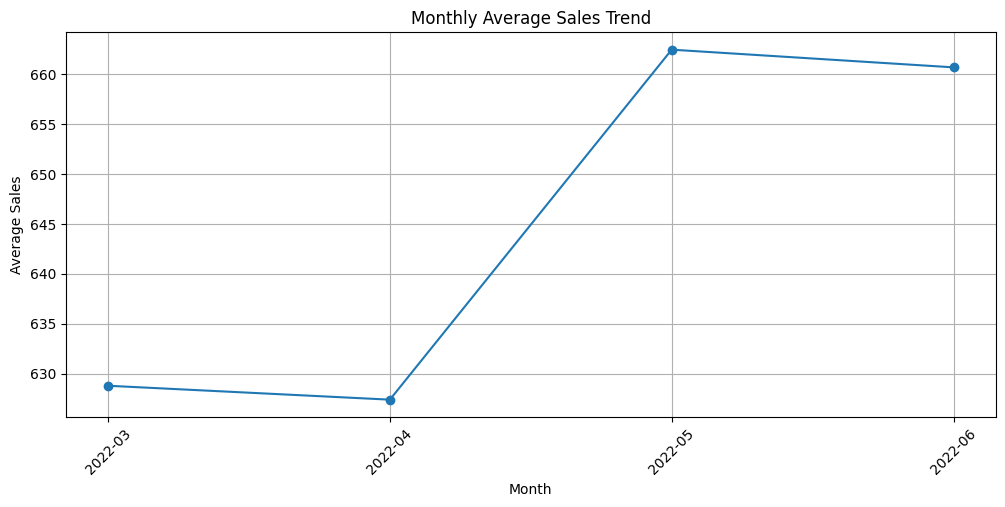

In [ ]:
import matplotlib.pyplot as plt

monthly_avg_sales = amazon.groupby(amazon['Order_Date'].dt.to_period("M"))['Sale_Amount'].mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_avg_sales.index.astype(str), monthly_avg_sales.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.title("Monthly Average Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Average Order Value (AOV) for each item**

C:\Users\HP\AppData\Local\Temp\ipykernel_15480\2871247290.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_categories.values, y=top_avg_categories.index, palette="viridis")


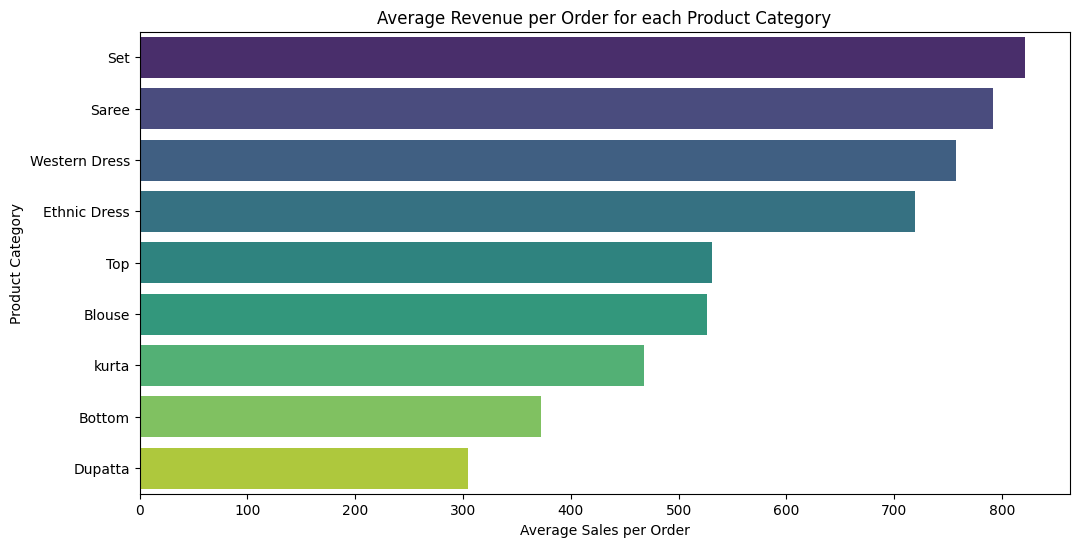

In [ ]:
import seaborn as sns

top_avg_categories = amazon.groupby('Product_Category')['Sale_Amount'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_avg_categories.values, y=top_avg_categories.index, palette="viridis")
plt.xlabel("Average Sales per Order")
plt.ylabel("Product Category")
plt.title("Average Revenue per Order for each Product Category")
plt.show()

**State-Wise Order Distribution**

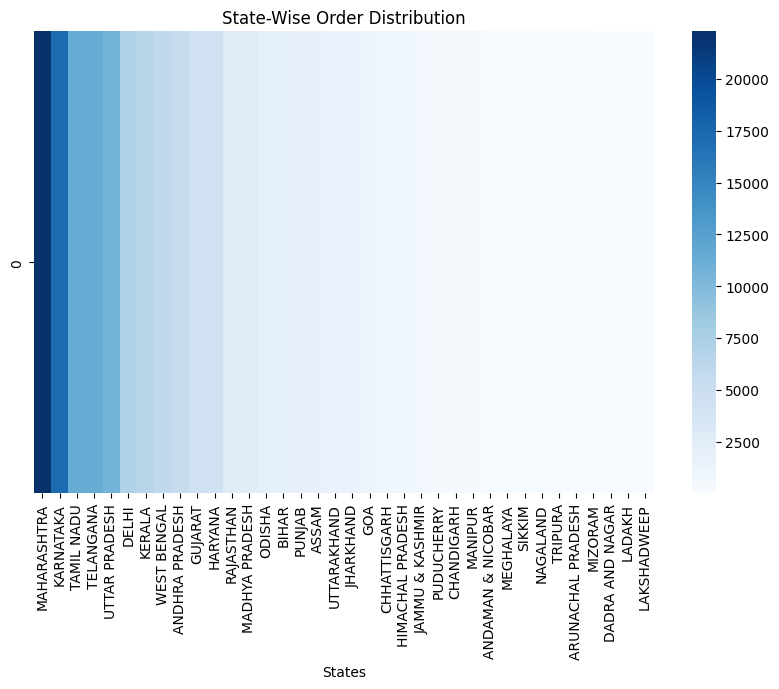

In [ ]:
import numpy as np

state_orders = amazon['Shipping_State'].value_counts()

plt.figure(figsize=(10, 6))
sns.heatmap(np.array([state_orders.values]), cmap="Blues", annot=False, fmt="d", xticklabels=state_orders.index)
plt.xlabel("States")
plt.title("State-Wise Order Distribution")
plt.xticks(rotation=90)
plt.show()


# SALES REPORT

In [ ]:
sales=pd.read_csv("data/Original CSV/Sale Report.csv")

In [ ]:
sales.dtypes

index                 int64
Product_SKU          object
Design_Number        object
Stock_Level         float64
Product_Category     object
Product_Size         object
Product_Color        object
dtype: object

In [ ]:
print(sales.isnull().sum())

index                0
Product_SKU         83
Design_Number       36
Stock_Level         36
Product_Category    45
Product_Size        36
Product_Color       45
dtype: int64


In [ ]:
missing_percentage = sales.isnull().sum() / len(sales) * 100
print(missing_percentage)

index               0.000000
Product_SKU         0.895265
Design_Number       0.388308
Stock_Level         0.388308
Product_Category    0.485385
Product_Size        0.388308
Product_Color       0.485385
dtype: float64


In [ ]:
fill_na_based_on_skew(sales, 'Stock_Level')

C:\Users\HP\AppData\Local\Temp\ipykernel_3384\3934627601.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [ ]:
check_unique_values(sales, 'Product_Category')

In [ ]:
categorical_cols=['Product_Category','Product_Size','Product_Color']

fill_categorical_missing(sales, categorical_cols)

C:\Users\HP\AppData\Local\Temp\ipykernel_3384\3297095365.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


index    Product_SKU Design_Number  Stock_Level Product_Category  \
0         0    AN201-RED-L         AN201          5.0    AN : LEGGINGS   
1         1    AN201-RED-M         AN201          5.0    AN : LEGGINGS   
2         2    AN201-RED-S         AN201          3.0    AN : LEGGINGS   
3         3   AN201-RED-XL         AN201          6.0    AN : LEGGINGS   
4         4  AN201-RED-XXL         AN201          3.0    AN : LEGGINGS   
...     ...            ...           ...          ...              ...   
9266   9266            NaN           NaN          8.0            KURTA   
9267   9267            NaN           NaN          8.0            KURTA   
9268   9268            NaN           NaN          8.0            KURTA   
9269   9269            NaN           NaN          8.0            KURTA   
9270   9270            NaN           NaN          8.0            KURTA   

     Product_Size Product_Color  
0               L           Red  
1               M           Red  
2               S           Red  
3              XL           Red  
4             XXL           Red  
...           ...           ...  
9266            S          Blue  
9267            S          Blue  
9268            S          Blue  
9269            S          Blue  
9270            S          Blue  

[9271 rows x 7 columns]

In [ ]:
sales['Product_SKU'] = sales.groupby('Product_Category')['Product_SKU'].transform(fill_missing_mode)
sales['Design_Number'] = sales.groupby('Product_Category')['Design_Number'].transform(fill_missing_mode)

print(sales[sales['Product_Category'].notnull() & sales['Product_SKU'].isnull()])
print(sales[sales['Product_Category'].notnull() & sales['Design_Number'].isnull()])

Empty DataFrame
Columns: [index, Product_SKU, Design_Number, Stock_Level, Product_Category, Product_Size, Product_Color]
Index: []
Empty DataFrame
Columns: [index, Product_SKU, Design_Number, Stock_Level, Product_Category, Product_Size, Product_Color]
Index: []


In [ ]:
sales['Stock_Level'] = sales['Stock_Level'].astype(int)

In [ ]:
print(sales.isnull().sum())

index               0
Product_SKU         0
Design_Number       0
Stock_Level         0
Product_Category    0
Product_Size        0
Product_Color       0
dtype: int64


In [ ]:
ref_count = (sales['Product_SKU'] == '#REF!').sum()

print(f"Number of rows with Product_SKU as '#REF!': {ref_count}")

Number of rows with Product_SKU as '#REF!': 22


In [ ]:
blouse_mode = sales.loc[sales['Product_Category'] == 'BLOUSE', 'Product_SKU'].mode()
print(f"Mode of Product_SKU when Product_Category is 'BLOUSE': {blouse_mode.tolist()}")

Mode of Product_SKU when Product_Category is 'BLOUSE': ['#REF!']


In [ ]:
ref_count_blouse = (sales['Product_Category'] == 'BLOUSE')
print(f"Number of '#REF!' in Product_SKU when Product_Category is 'BLOUSE': {ref_count_blouse.sum()}")

Number of '#REF!' in Product_SKU when Product_Category is 'BLOUSE': 241


In [ ]:
sales = sales[sales['Product_SKU'] != '#REF!']

In [ ]:
print(sales.duplicated().sum())

0


In [ ]:
sales.dtypes

index                int64
Product_SKU         object
Design_Number       object
Stock_Level          int64
Product_Category    object
Product_Size        object
Product_Color       object
dtype: object

In [ ]:
sales.to_csv('sales_mod.csv', index=False)

In [ ]:
FileLink('sales_mod.csv')

c:\Users\HP\OneDrive\Desktop\Dataviz\data_viz_project_iitm\sales_mod.csv

# SALES PREDICTION

In [ ]:
import pandas as pd

sales=pd.read_csv('data/Cleaned/sales_mod.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = sales.drop('Stock_Level', axis=1)
y = sales['Stock_Level']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 14.93
R² Score: 0.40


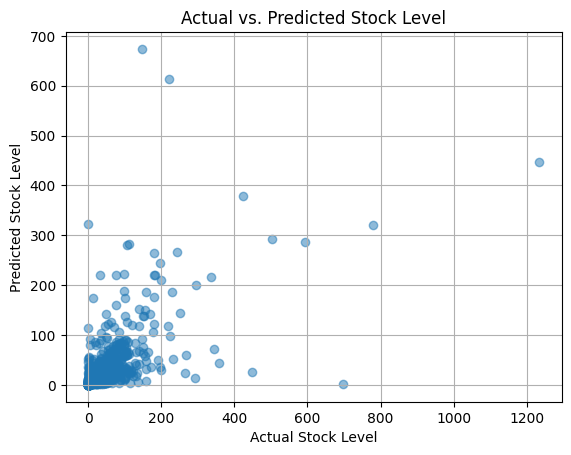

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Stock Level")
plt.ylabel("Predicted Stock Level")
plt.title("Actual vs. Predicted Stock Level")
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()


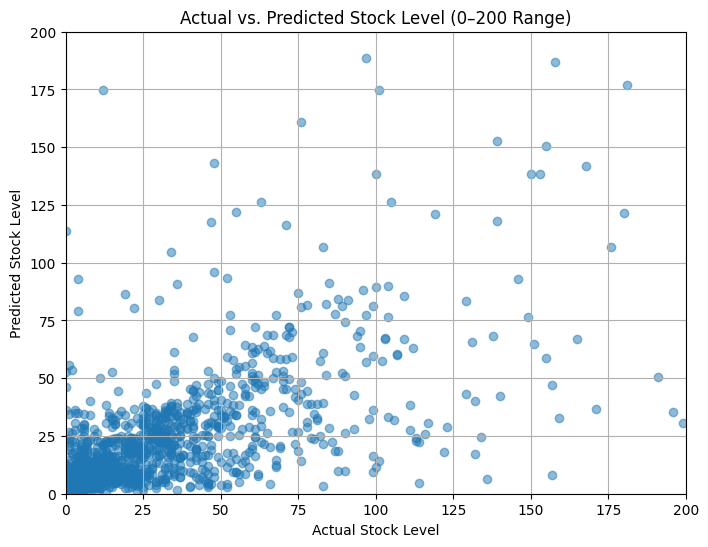

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Stock Level")
plt.ylabel("Predicted Stock Level")
plt.title("Actual vs. Predicted Stock Level (0–200 Range)")
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.grid(True)
plt.savefig('actual_vs_predicted_zoomed.png')
plt.show()



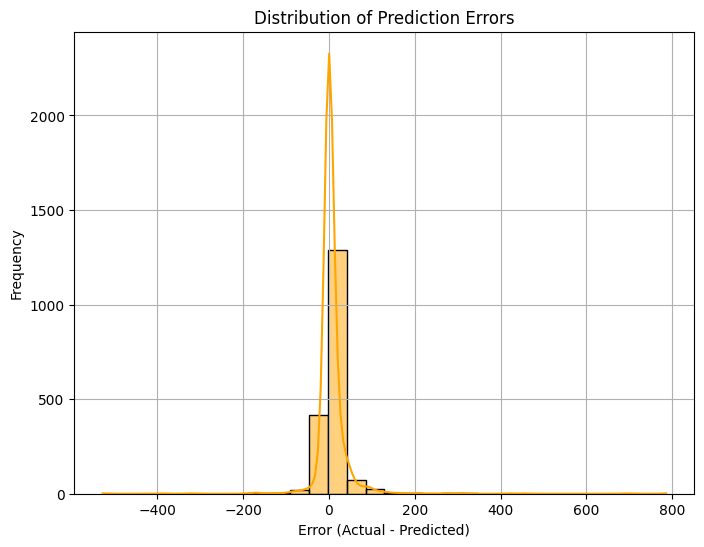

In [ ]:
import seaborn as sns
errors = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color='orange')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig('distribution_of_prediction_errors.png')
plt.show()


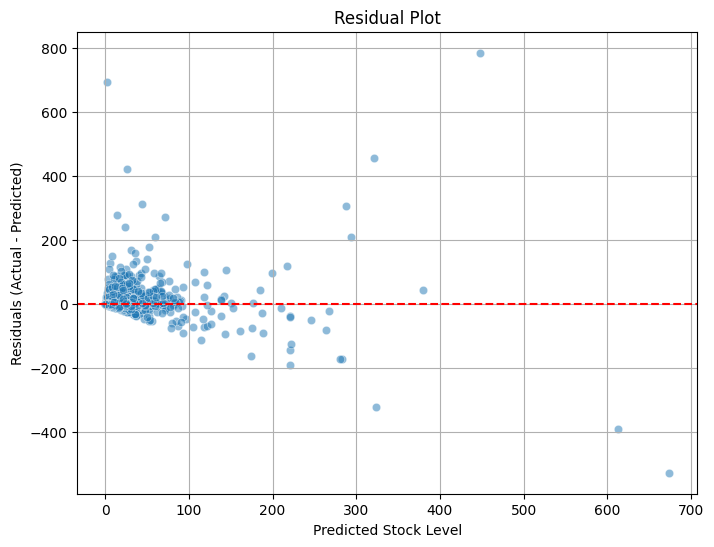

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Stock Level")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.savefig('residual_plot.png')
plt.show()



# EXPENSE IIGF

In [ ]:
exp=pd.read_csv('data/Expense IIGF-mod1.csv')

In [ ]:
print(exp.isnull().sum())

index              0
Received_Date      0
Received_Amount    0
Particular         0
Expense_Amount     0
dtype: int64


In [ ]:
exp.dtypes

index                       int64
Received_Date      datetime64[ns]
Received_Amount             int64
Particular                 object
Expense_Amount              int64
dtype: object

In [ ]:
exp['Received_Date'] = pd.to_datetime(exp['Received_Date'], format='%m/%d/%Y', errors='coerce')

In [ ]:
exp.to_csv('exp_mod.csv', index=False)

In [ ]:
FileLink('exp_mod.csv')

c:\Users\HP\OneDrive\Desktop\Dataviz\data_viz_project_iitm\exp_mod.csv

# AMAZON VISUALISATION AND PREDICTION

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy5rw0ab7/0ft_62na.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy5rw0ab7/a7a8xpt_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54561', 'data', 'file=/tmp/tmpy5rw0ab7/0ft_62na.json', 'init=/tmp/tmpy5rw0ab7/a7a8xpt_.json', 'output', 'file=/tmp/tmpy5rw0ab7/prophet_modelcoftasph/prophet_model-20250404084919.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:49:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


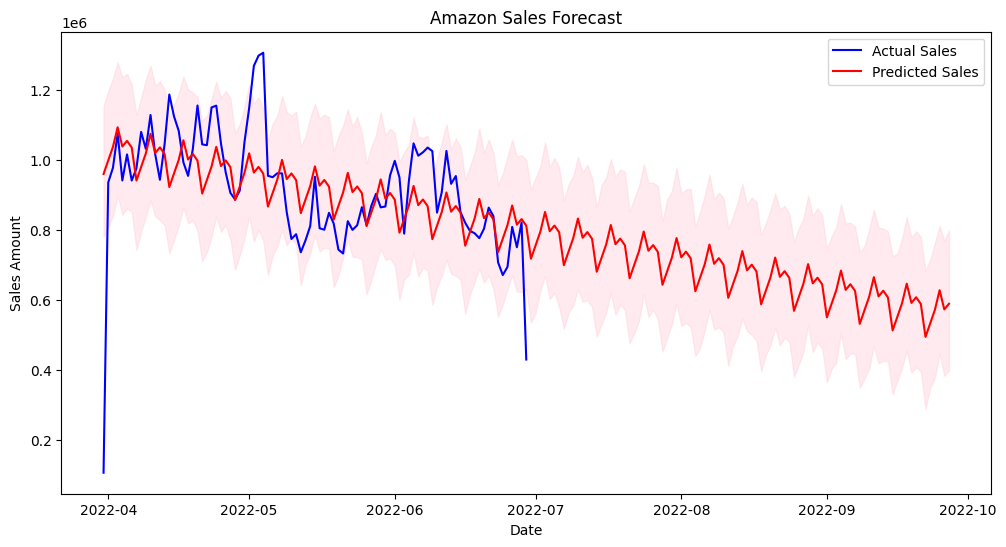

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

df = pd.read_csv("amazon_mod.csv", parse_dates=["Order_Date"])

sales_data = df.groupby("Order_Date")["Sale_Amount"].sum().reset_index()

sales_data = sales_data.rename(columns={"Order_Date": "ds", "Sale_Amount": "y"})

model = Prophet()
model.fit(sales_data)

future_dates = model.make_future_dataframe(periods=90)

forecast = model.predict(future_dates)

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data, x="ds", y="y", label="Actual Sales", color="blue")
sns.lineplot(data=forecast, x="ds", y="yhat", label="Predicted Sales", color="red")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="pink", alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.title("Amazon Sales Forecast")
plt.legend()
plt.show()


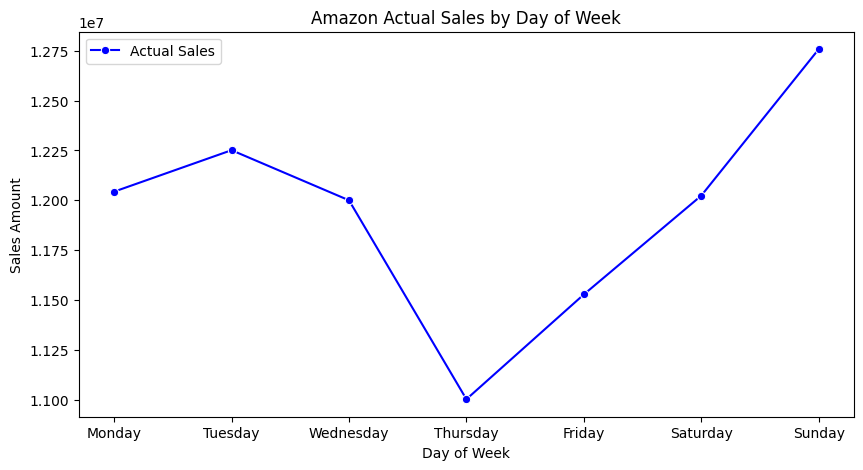

In [ ]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Day_of_Week"] = df["Order_Date"].dt.day_name()

df_weekly = df.groupby("Day_of_Week")["Sale_Amount"].sum().reset_index()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_weekly["Day_of_Week"] = pd.Categorical(df_weekly["Day_of_Week"], categories=days_order, ordered=True)
df_weekly = df_weekly.sort_values("Day_of_Week")

plt.figure(figsize=(10, 5))
sns.lineplot(x=df_weekly["Day_of_Week"], y=df_weekly["Sale_Amount"], marker="o", color="blue", label="Actual Sales")

plt.xlabel("Day of Week")
plt.ylabel("Sales Amount")
plt.title("Amazon Actual Sales by Day of Week")
plt.legend()
plt.show()


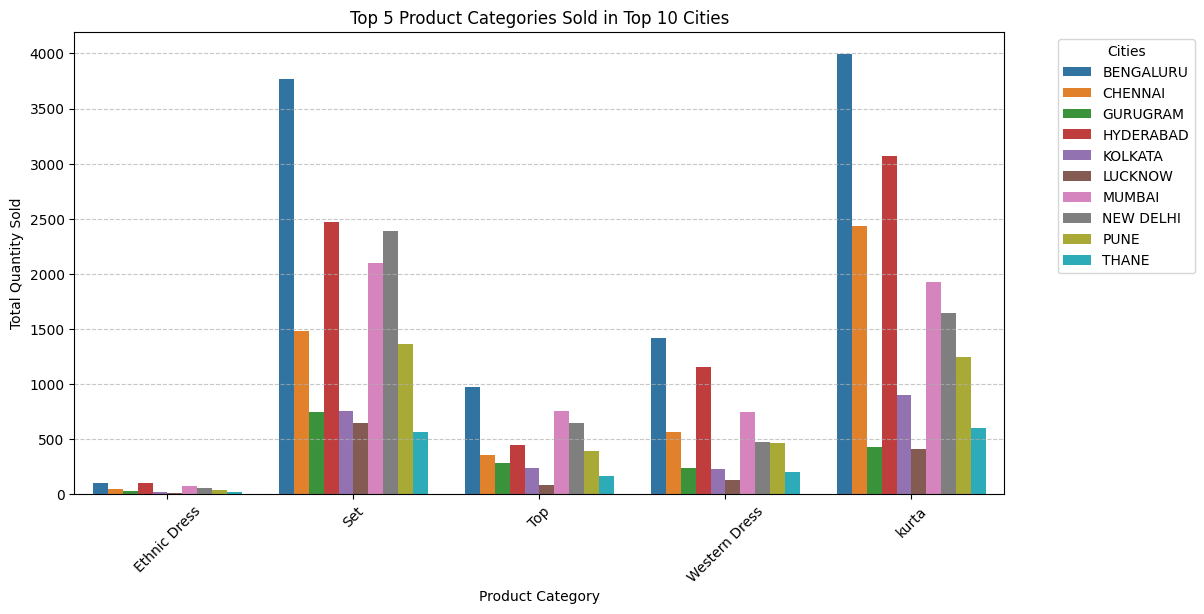

In [ ]:
city_category_sales = df.groupby(["Shipping_City", "Product_Category"])["Quantity"].sum().reset_index()

top_cities = city_category_sales.groupby("Shipping_City")["Quantity"].sum().nlargest(10).index
filtered_data = city_category_sales[city_category_sales["Shipping_City"].isin(top_cities)]

top_categories = filtered_data.groupby("Product_Category")["Quantity"].sum().nlargest(5).index
filtered_data = filtered_data[filtered_data["Product_Category"].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x="Product_Category", y="Quantity", hue="Shipping_City", dodge=True)

plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.title("Top 5 Product Categories Sold in Top 10 Cities")
plt.xticks(rotation=45)
plt.legend(title="Cities", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<ipython-input-13-8f55beef77f4>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_category_per_city = filtered_data.groupby("Shipping_City").apply(


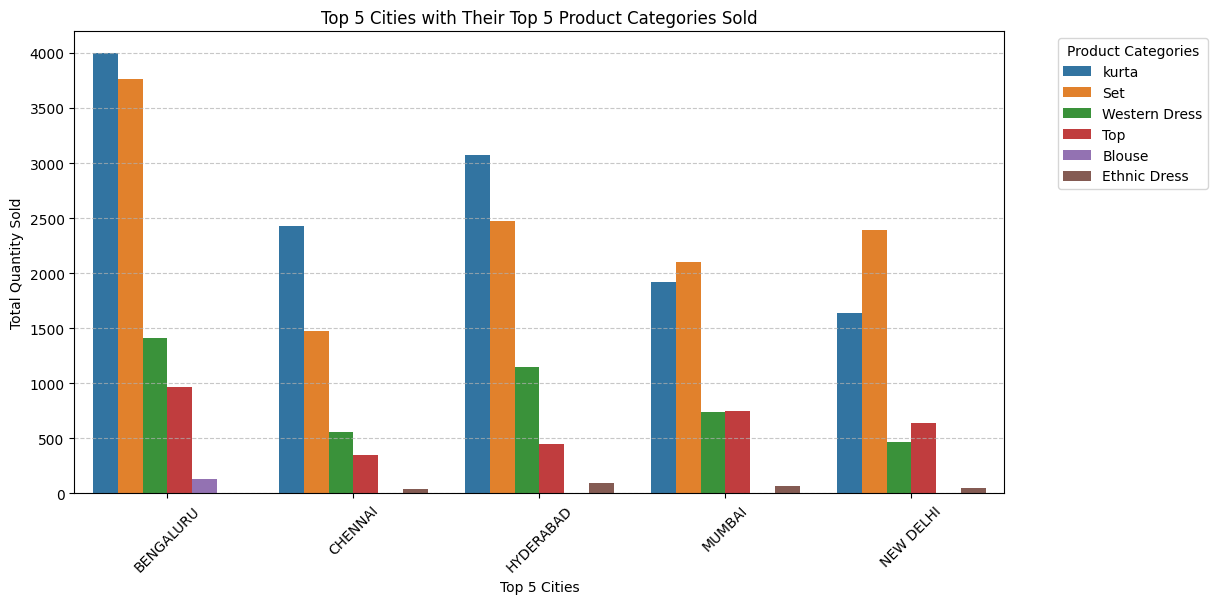

In [ ]:
city_category_sales = df.groupby(["Shipping_City", "Product_Category"])["Quantity"].sum().reset_index()

top_cities = city_category_sales.groupby("Shipping_City")["Quantity"].sum().nlargest(5).index
filtered_data = city_category_sales[city_category_sales["Shipping_City"].isin(top_cities)]

top_category_per_city = filtered_data.groupby("Shipping_City").apply(
    lambda x: x.nlargest(5, "Quantity")
).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_category_per_city, x="Shipping_City", y="Quantity", hue="Product_Category", dodge=True)

plt.xlabel("Top 5 Cities")
plt.ylabel("Total Quantity Sold")
plt.title("Top 5 Cities with Their Top 5 Product Categories Sold")
plt.xticks(rotation=45)
plt.legend(title="Product Categories", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()